
# **Project Name : ✨ CRADIT CARD FARUD DETECTION 💳 ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# **Aim Of The Project**

The aim of the Credit Card Fraud Detection dataset is to develop and evaluate machine learning models that can accurately identify fraudulent transactions, thereby enhancing financial security and preventing fraudulent activities.

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Normalize Data
from sklearn.preprocessing import StandardScaler

#Conert Categorical to Numerical Value
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
#from sklearn.metrics._plot.roc_curve import auc

# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

# **Univariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<ipython-input-9-c04fcf693b0f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["V1"], kde=True, color="orange", bins=10)


<Axes: xlabel='V1', ylabel='Density'>

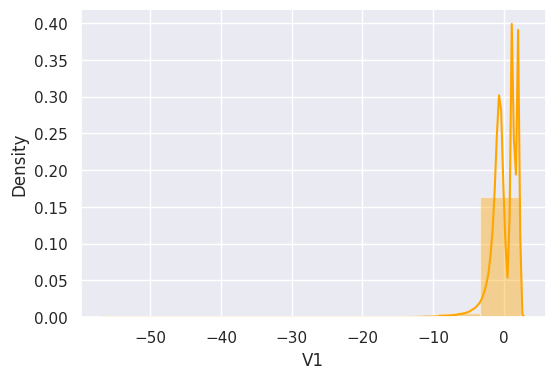

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["V1"], kde=True, color="orange", bins=10)

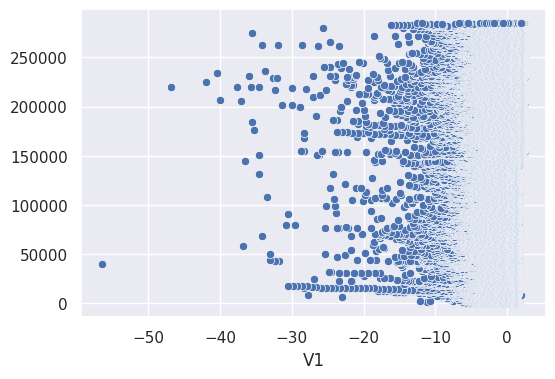

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="V1",y=df.index,data=df)
plt.show()

<ipython-input-11-342b63de67aa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["V2"], kde=True, color="orange", bins=10)


<Axes: xlabel='V2', ylabel='Density'>

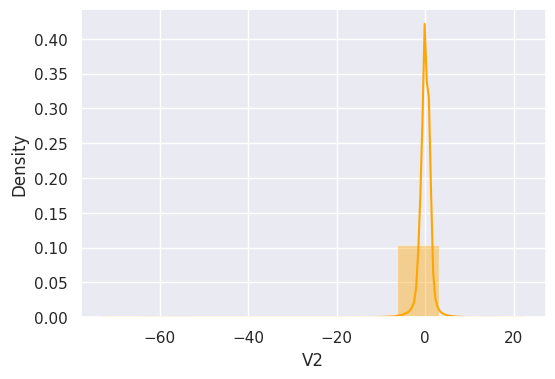

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["V2"], kde=True, color="orange", bins=10)

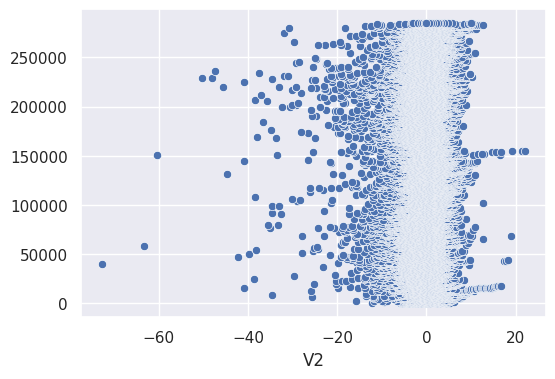

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="V2",y=df.index,data=df)
plt.show()

<ipython-input-13-dfc7b0748a25>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["V3"], kde=True, color="orange", bins=10)


<Axes: xlabel='V3', ylabel='Density'>

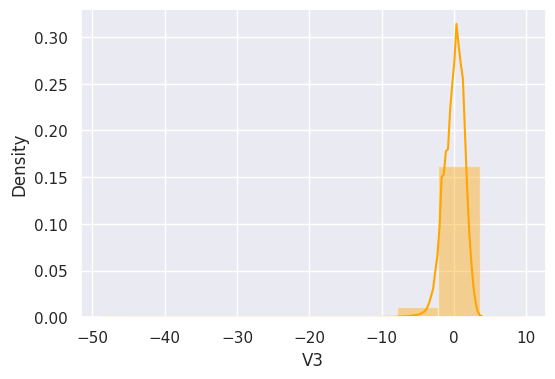

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["V3"], kde=True, color="orange", bins=10)

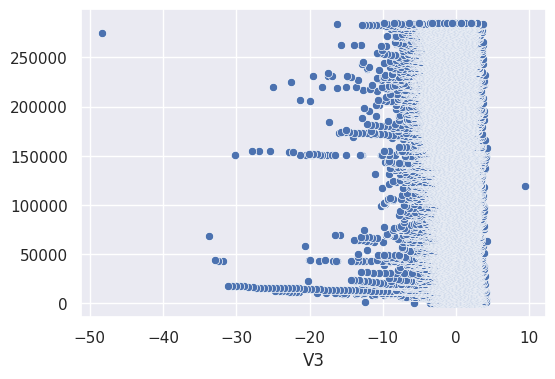

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="V3",y=df.index,data=df)
plt.show()

<ipython-input-15-98d6f08f3edd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["V4"], kde=True, color="orange", bins=10)


<Axes: xlabel='V4', ylabel='Density'>

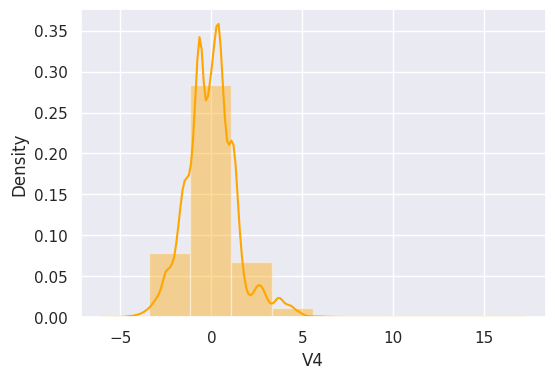

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["V4"], kde=True, color="orange", bins=10)

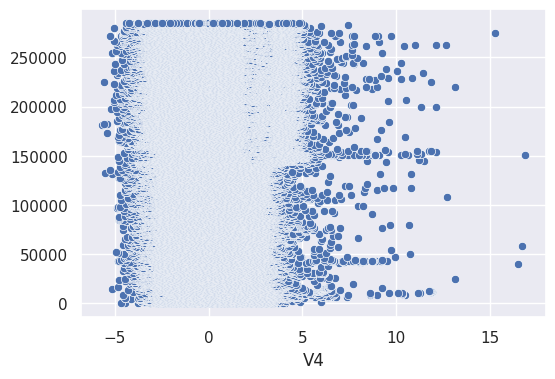

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="V4",y=df.index,data=df)
plt.show()

<ipython-input-17-22df16190771>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["V5"], kde=True, color="orange", bins=10)


<Axes: xlabel='V5', ylabel='Density'>

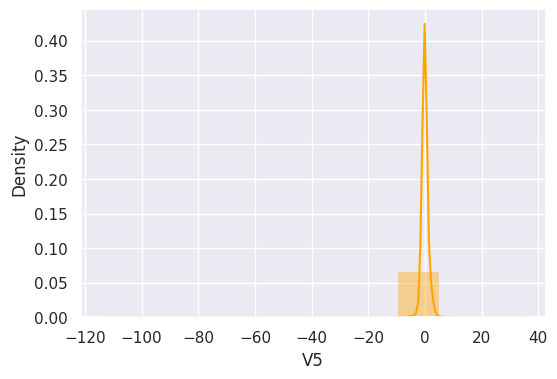

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["V5"], kde=True, color="orange", bins=10)

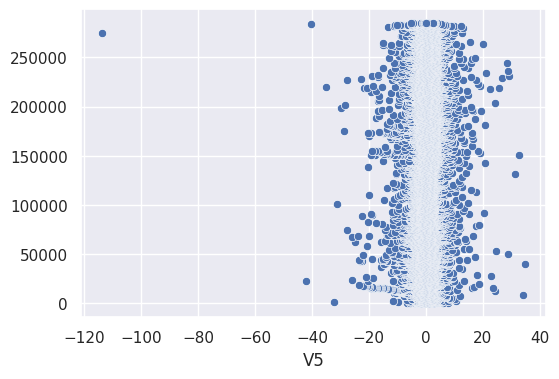

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="V5",y=df.index,data=df)
plt.show()

<ipython-input-19-e64da169a338>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Amount"], kde=True, color="orange", bins=10)


<Axes: xlabel='Amount', ylabel='Density'>

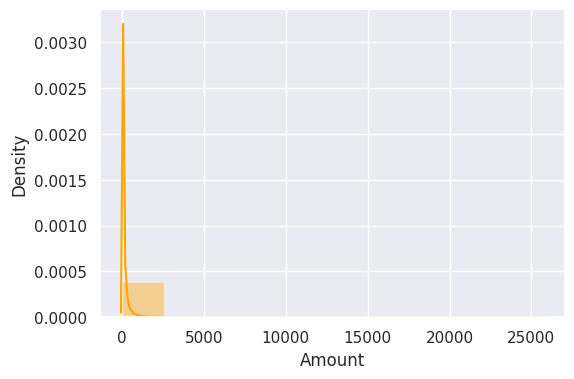

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Amount"], kde=True, color="orange", bins=10)

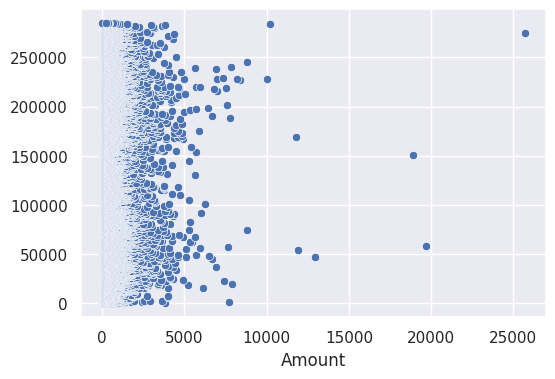

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Amount",y=df.index,data=df)
plt.show()

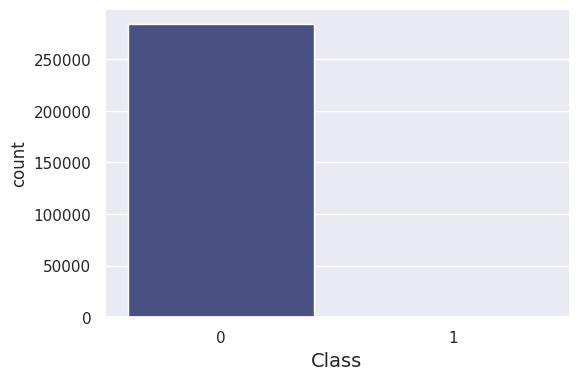

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class' , data=df ,palette='mako')
plt.xlabel('Class', fontsize=14)
plt.show()

In [ ]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# **EDA (Exploratory Data Analysis)**

#### **Remove Duplicate**

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

1081


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

0


#### **Remove NaN Values**

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### **Remove Outliers**

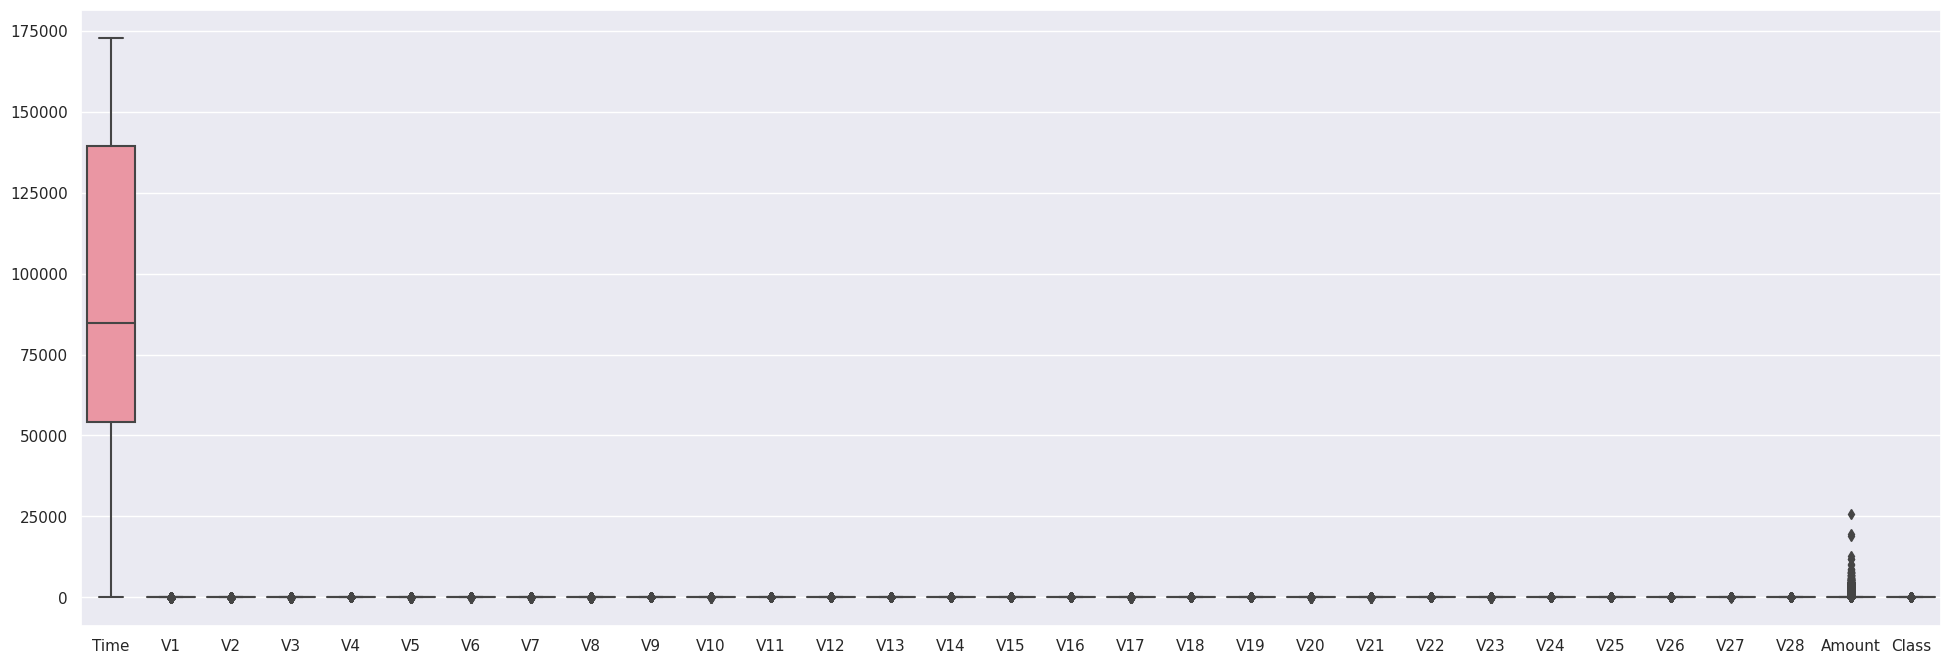

In [ ]:
plt.figure(figsize=(24,8))
sns.boxplot(df)
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [ ]:
df.columns.get_loc('Class')

30

In [ ]:
for i in df.columns:
  if df.columns.get_loc(i) == 30:
    pass
  else:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

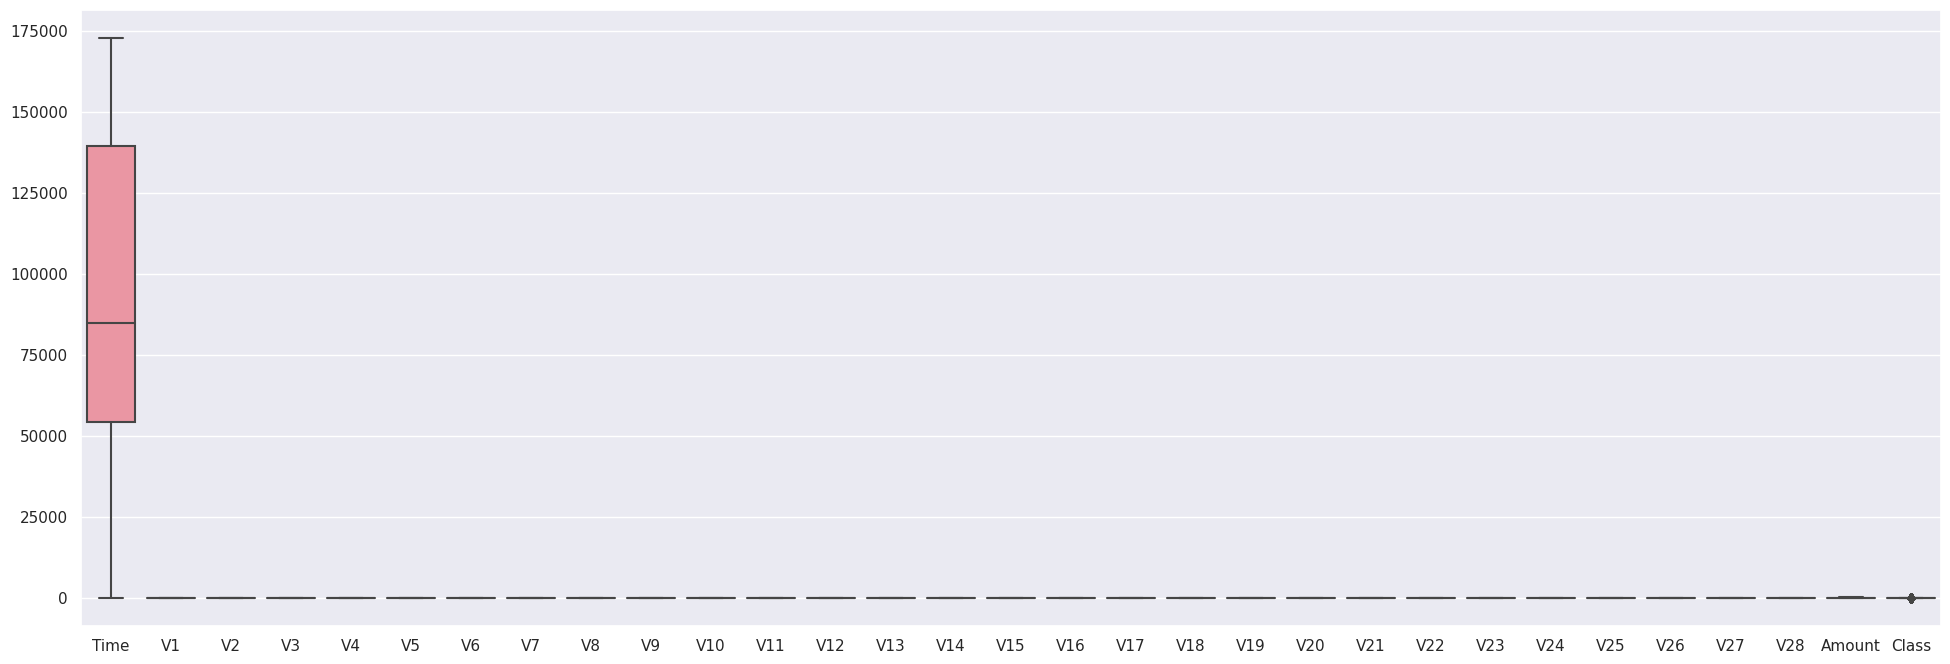

In [ ]:
plt.figure(figsize=(24,8))
sns.boxplot(df)
plt.show()

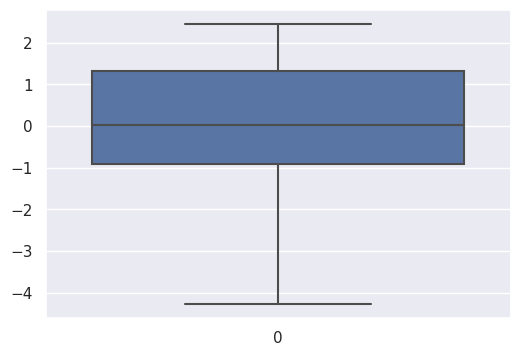

In [ ]:
sns.boxplot(df["V1"])
plt.show()

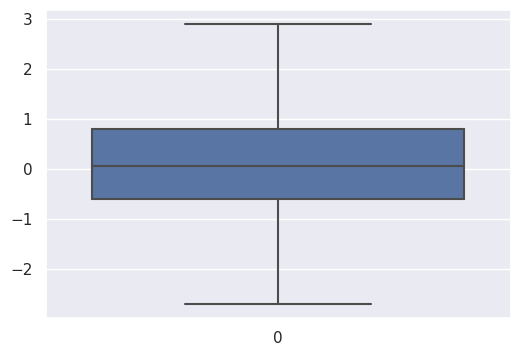

In [ ]:
sns.boxplot(df["V2"])
plt.show()

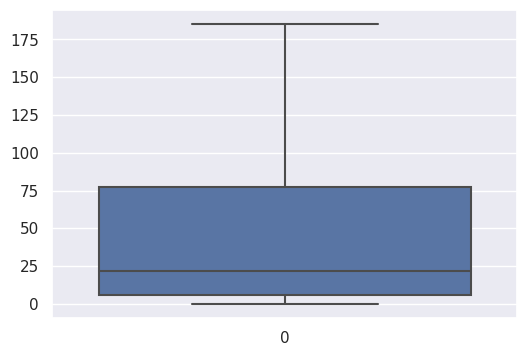

In [ ]:
sns.boxplot(df["Amount"])
plt.show()

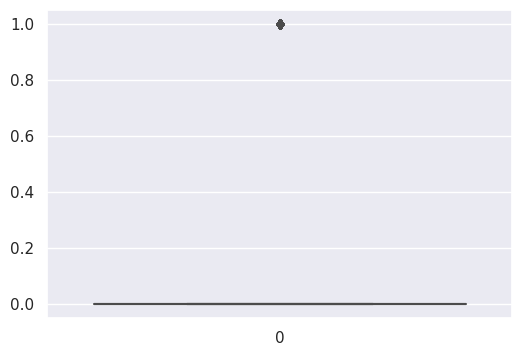

In [ ]:
sns.boxplot(df["Class"])
plt.show()

In [ ]:
df["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

#### **Bivariate Analysis**

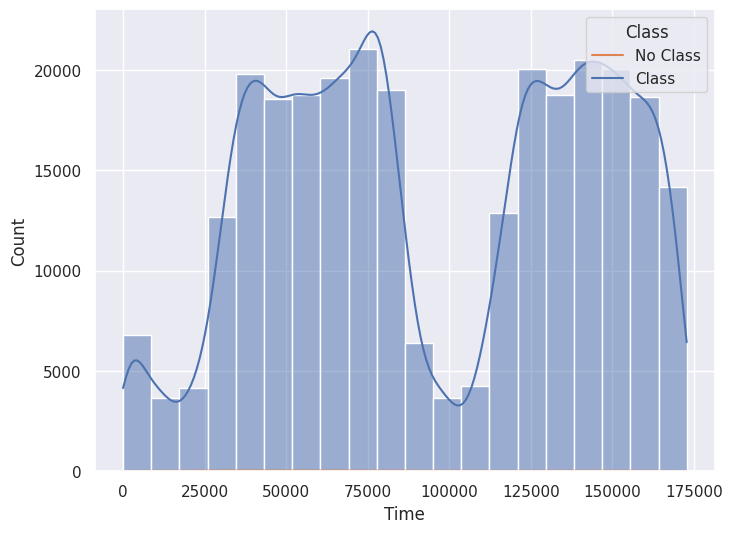

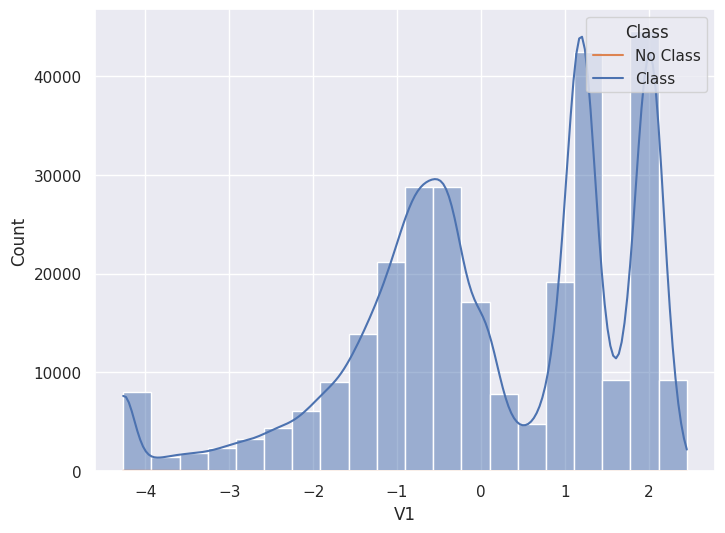

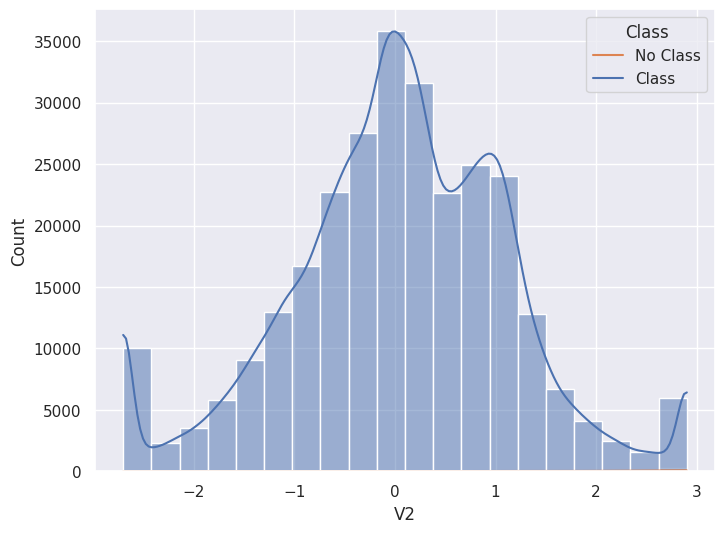

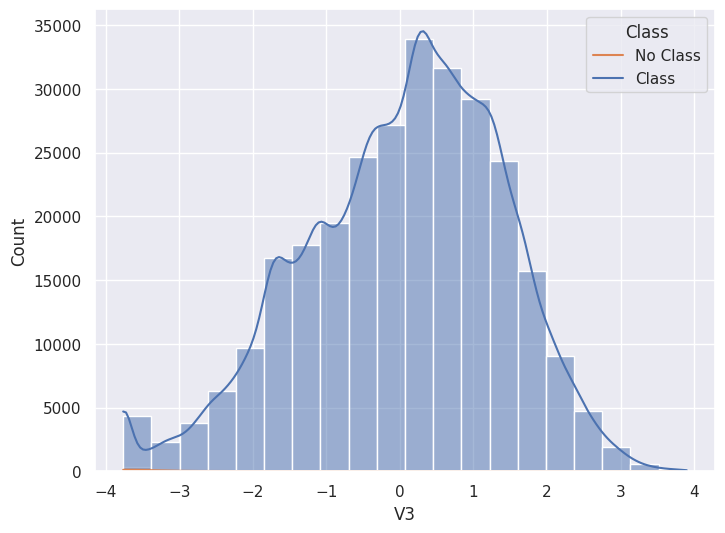

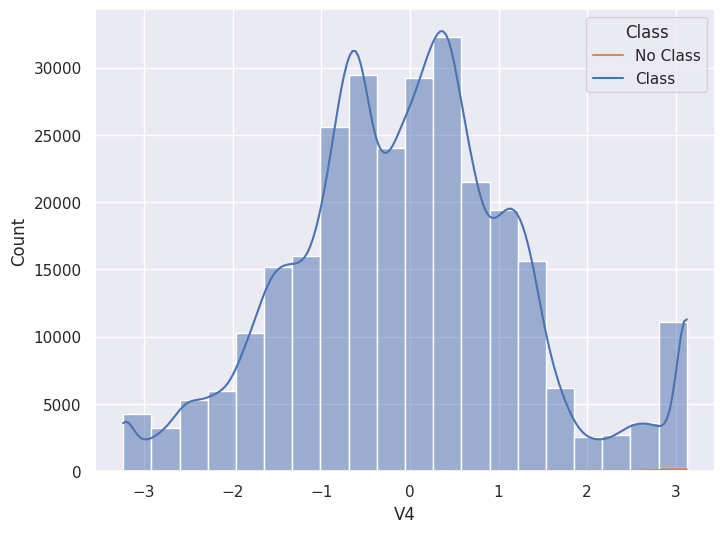

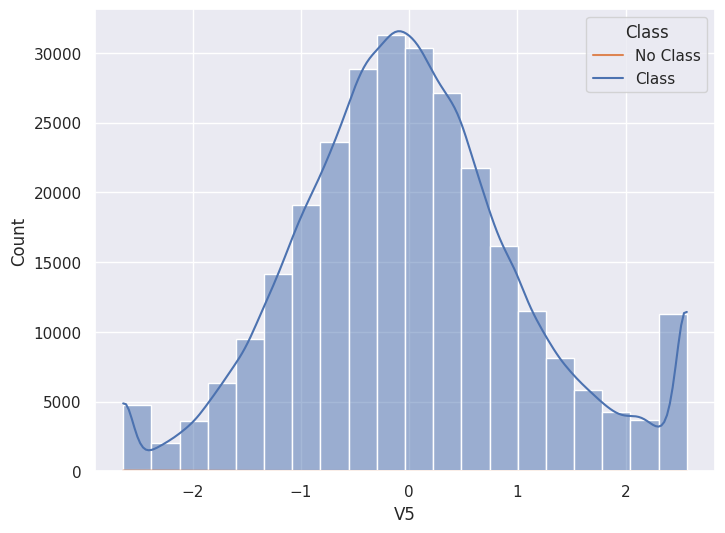

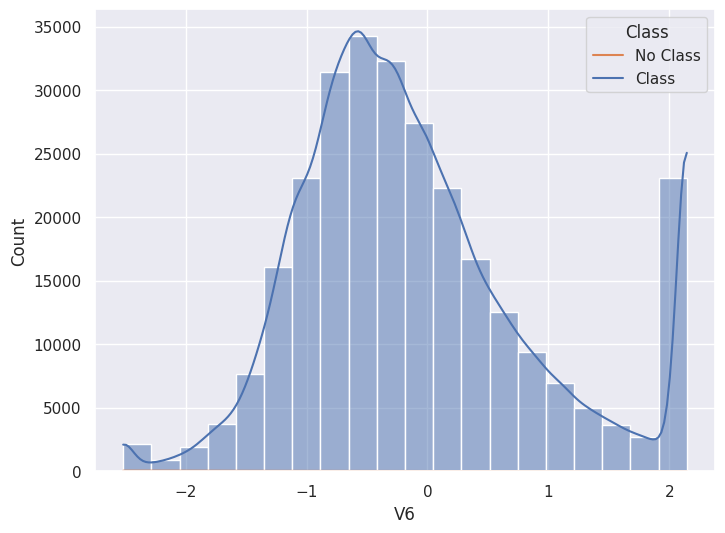

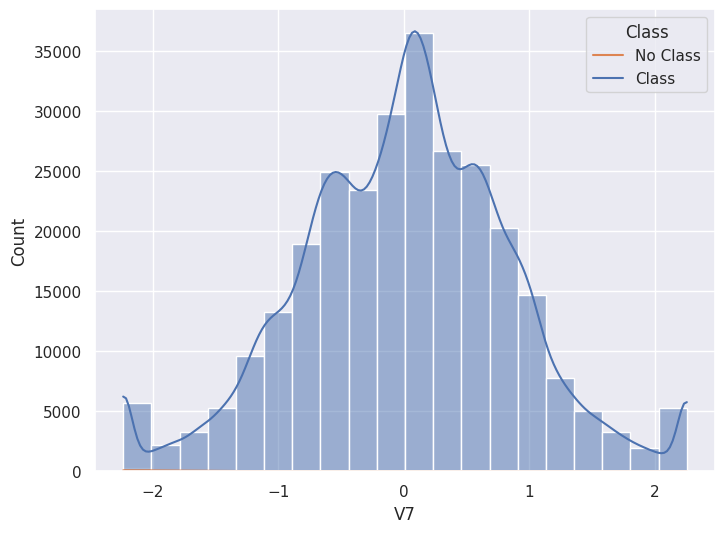

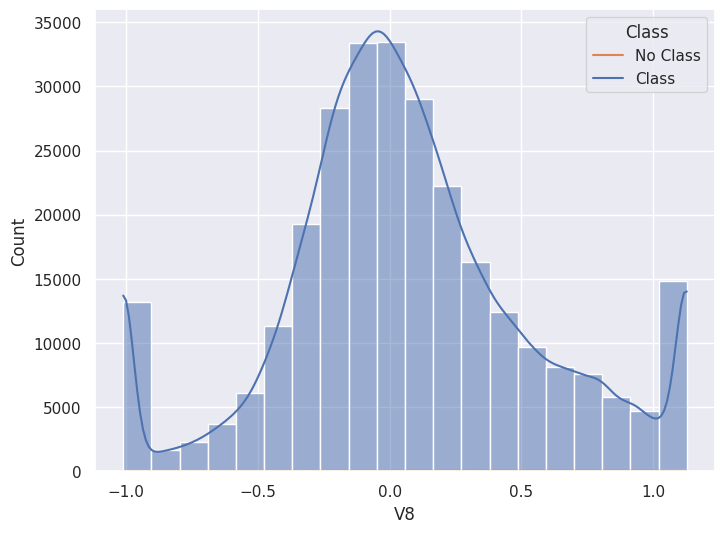

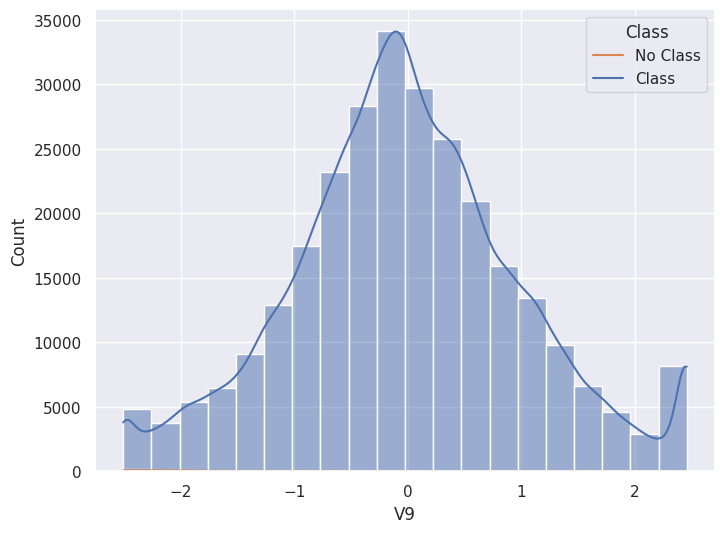

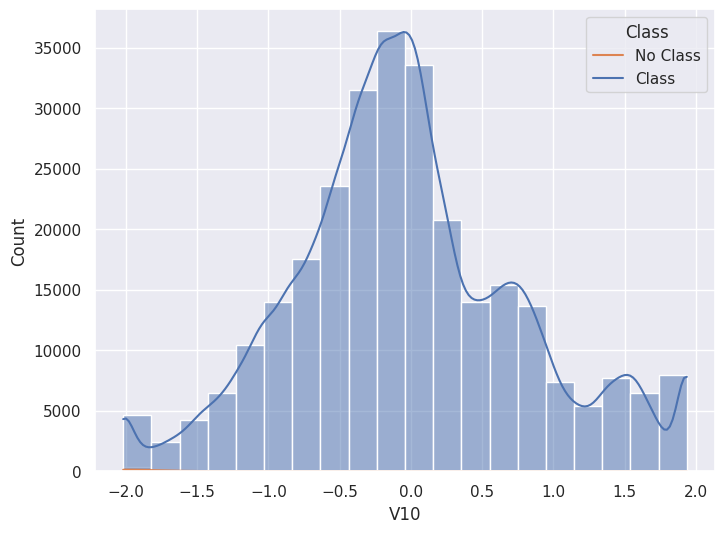

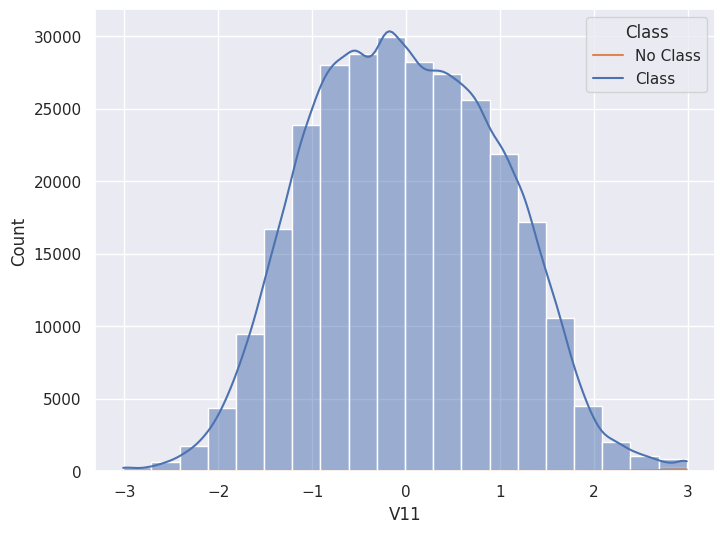

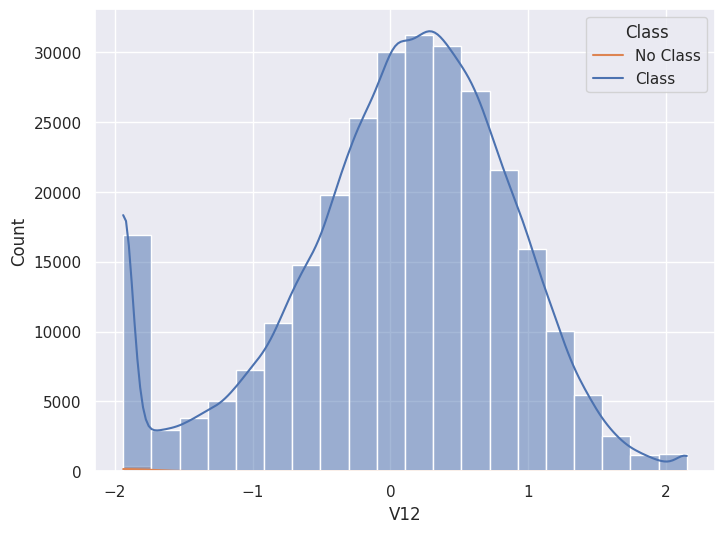

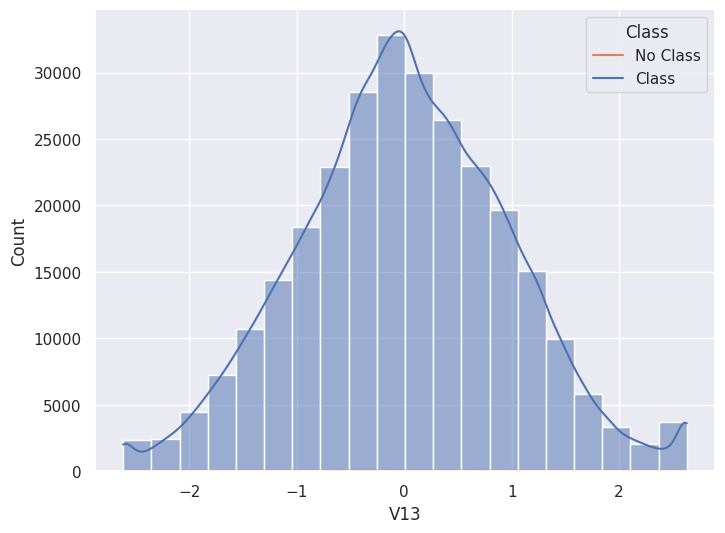

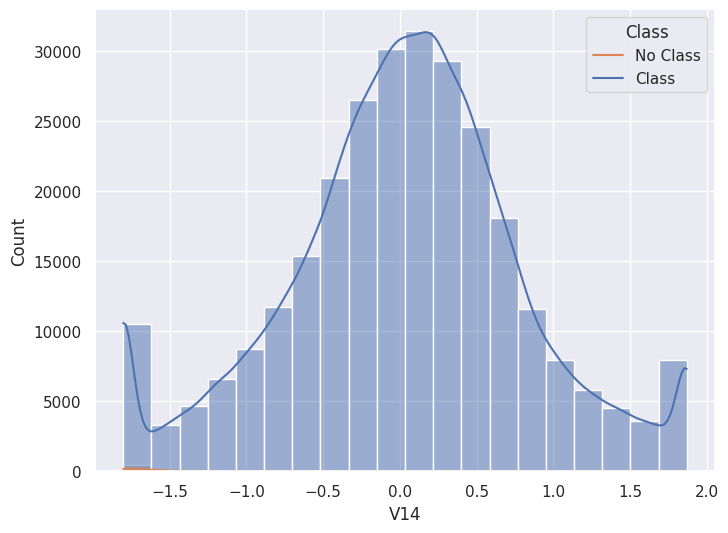

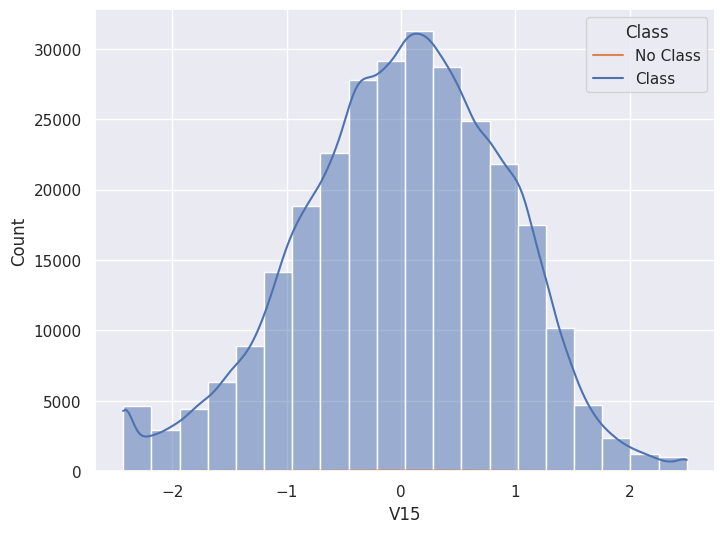

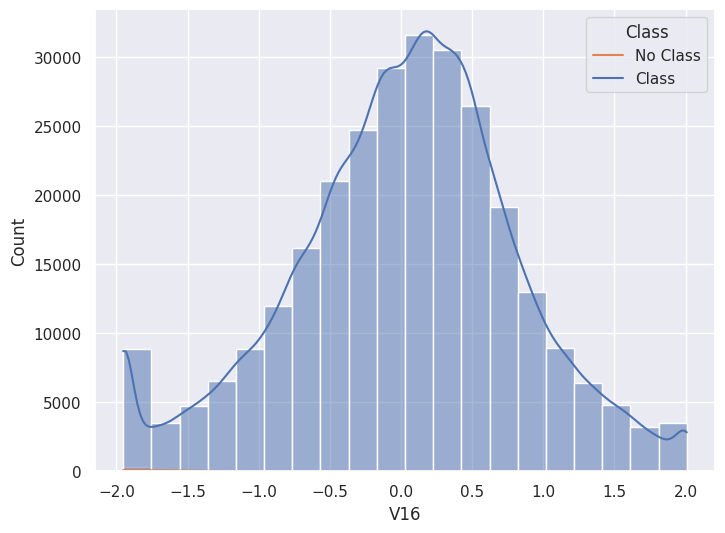

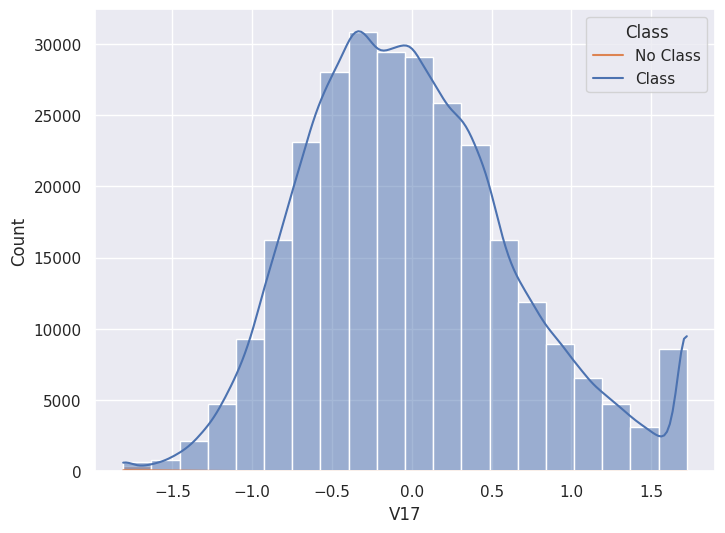

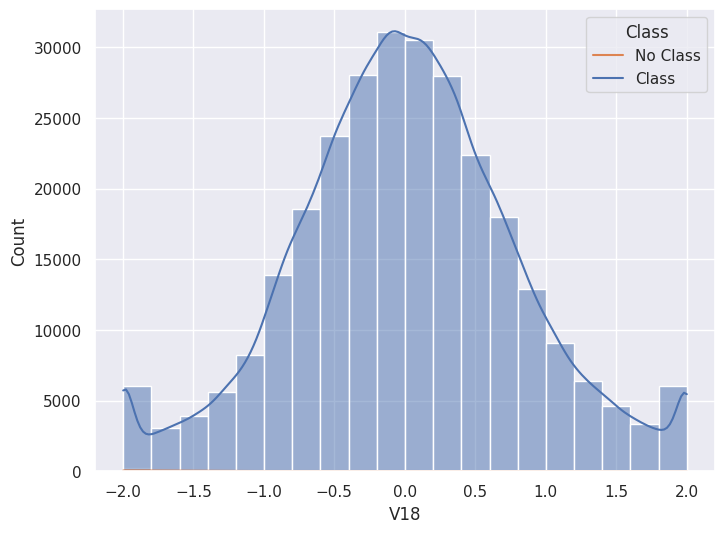

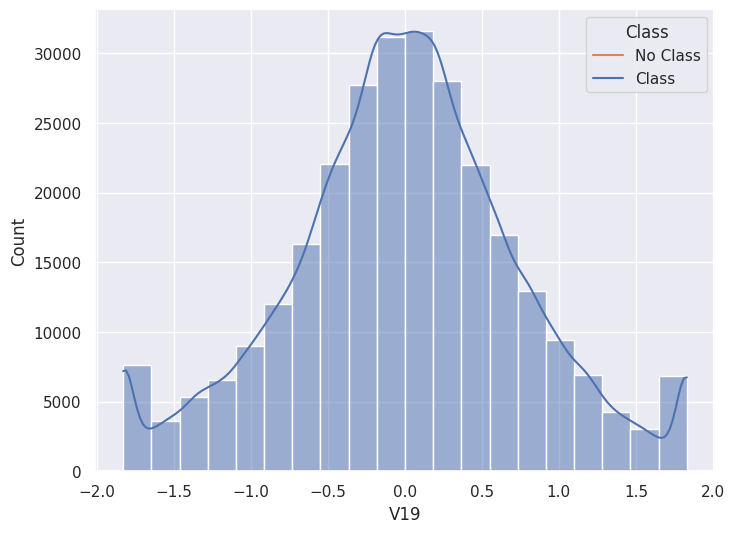

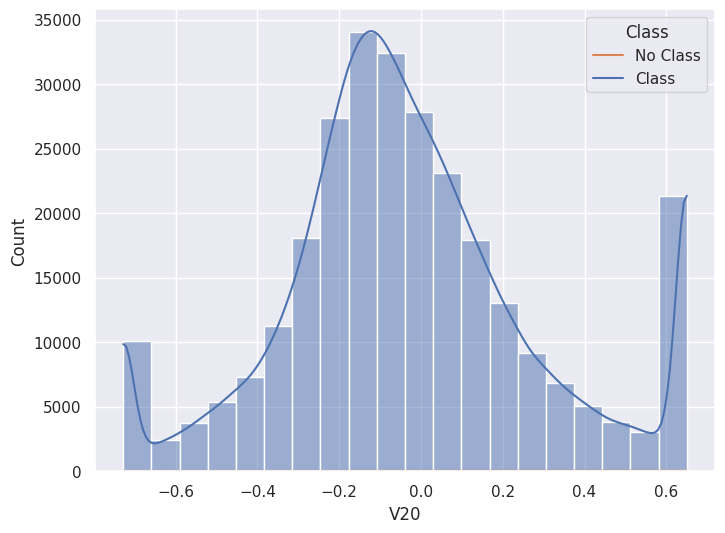

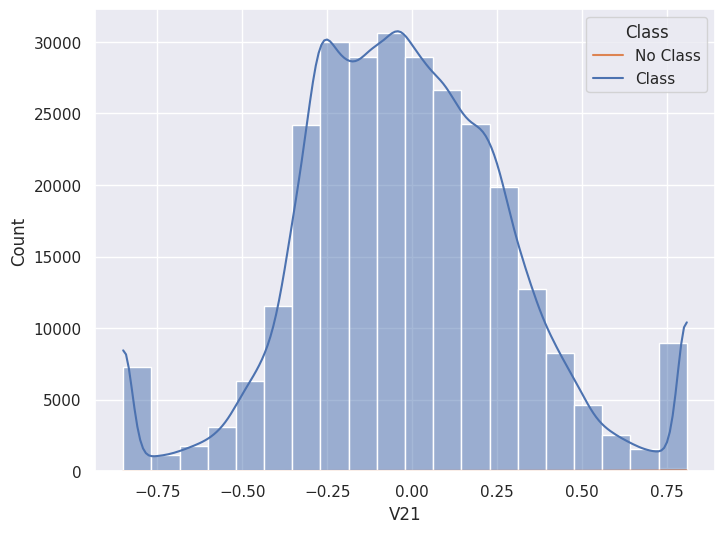

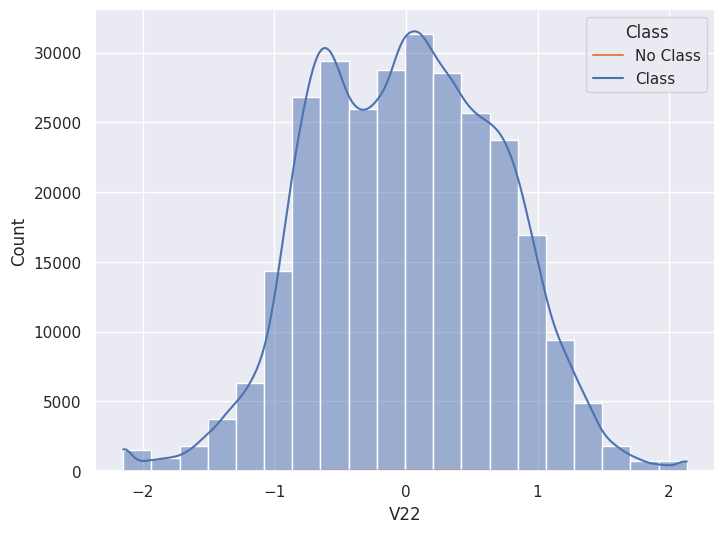

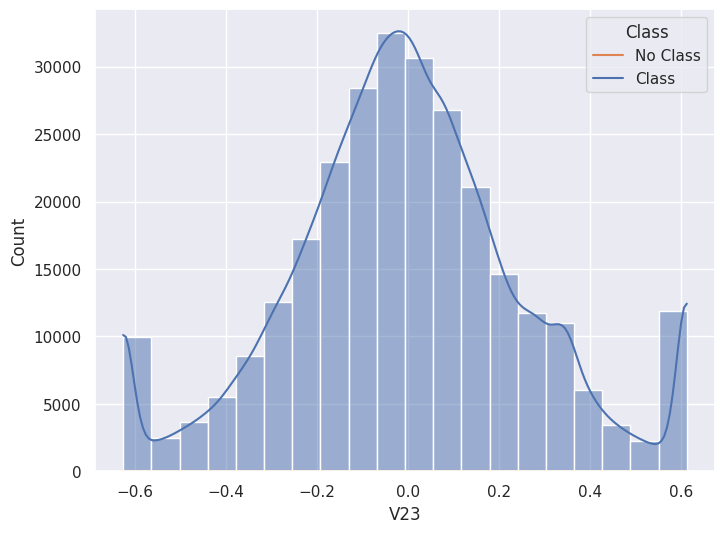

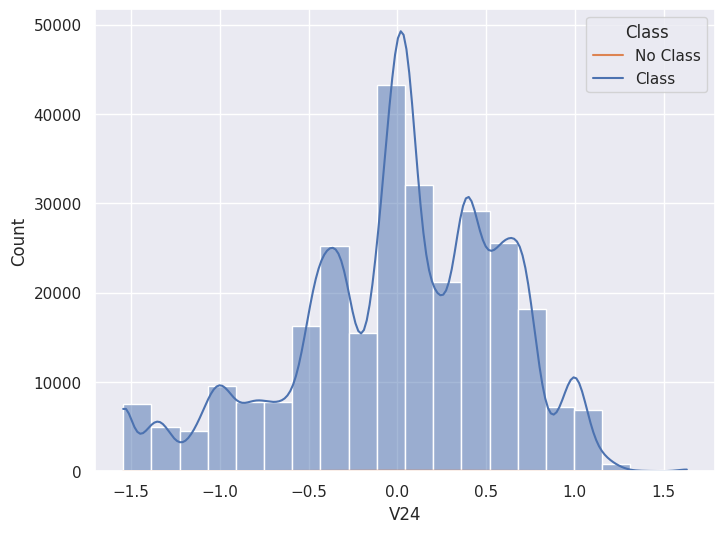

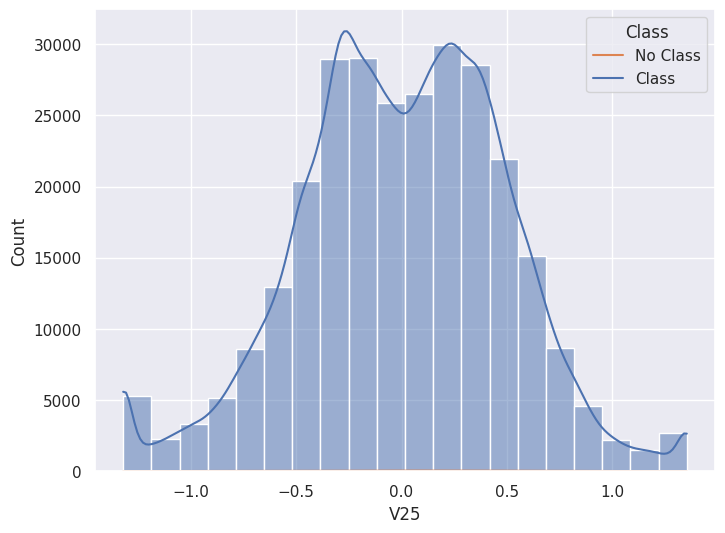

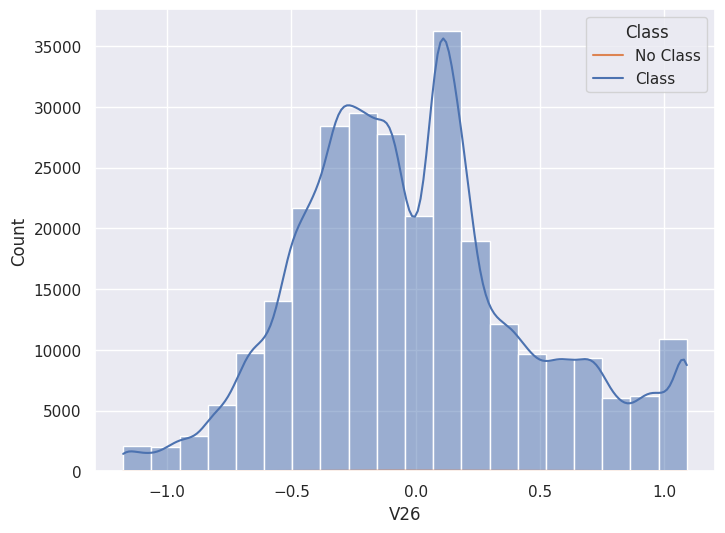

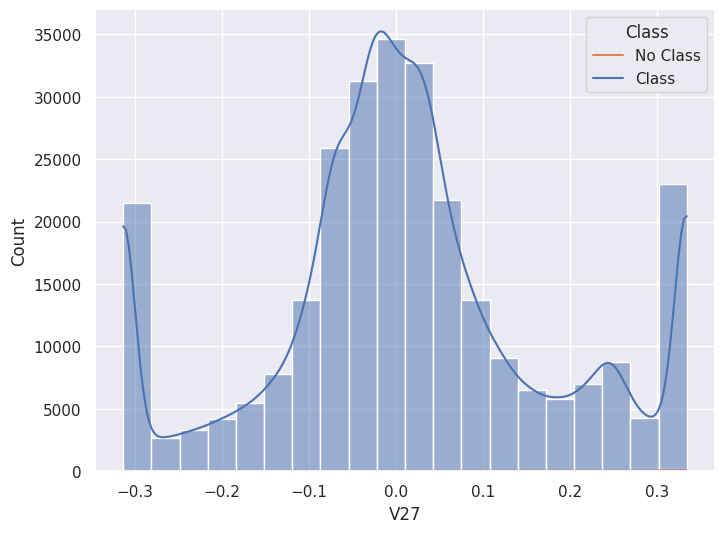

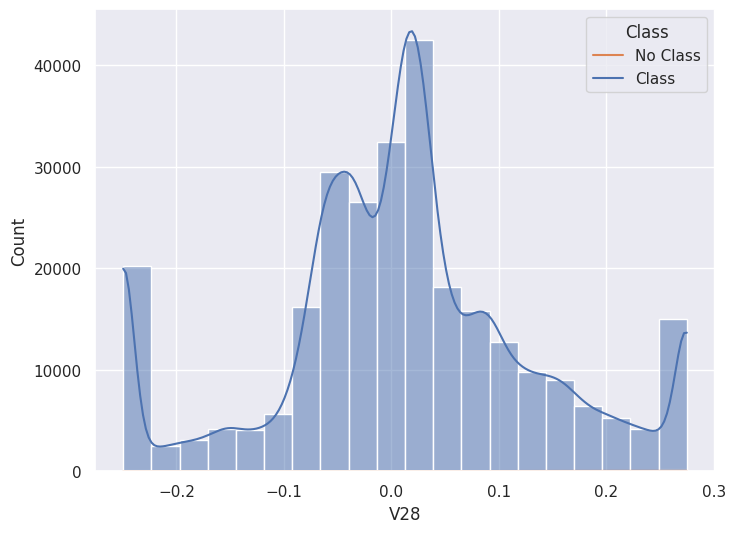

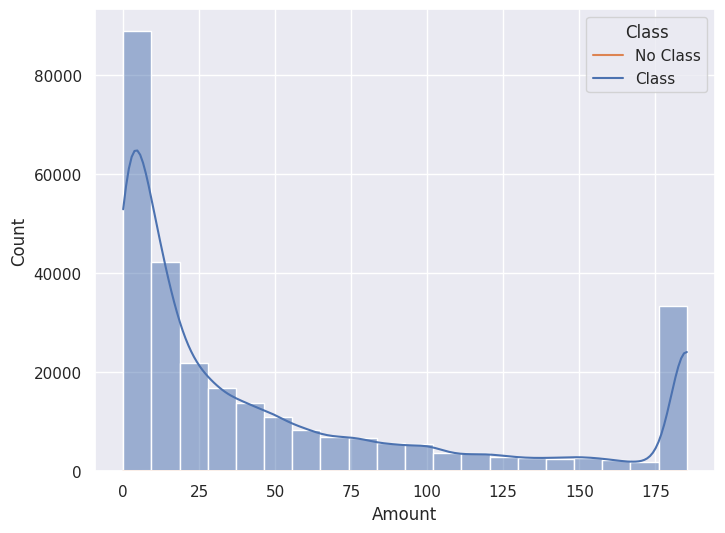

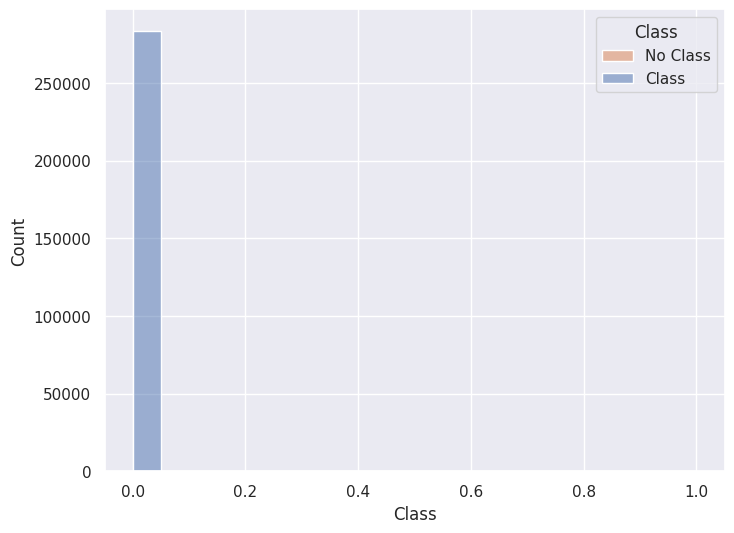

In [ ]:
for i in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(data=df, x=i, hue='Class', kde=True, bins=20)
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.legend(title='Class', loc='upper right', labels=['No Class', 'Class'])
  plt.show()

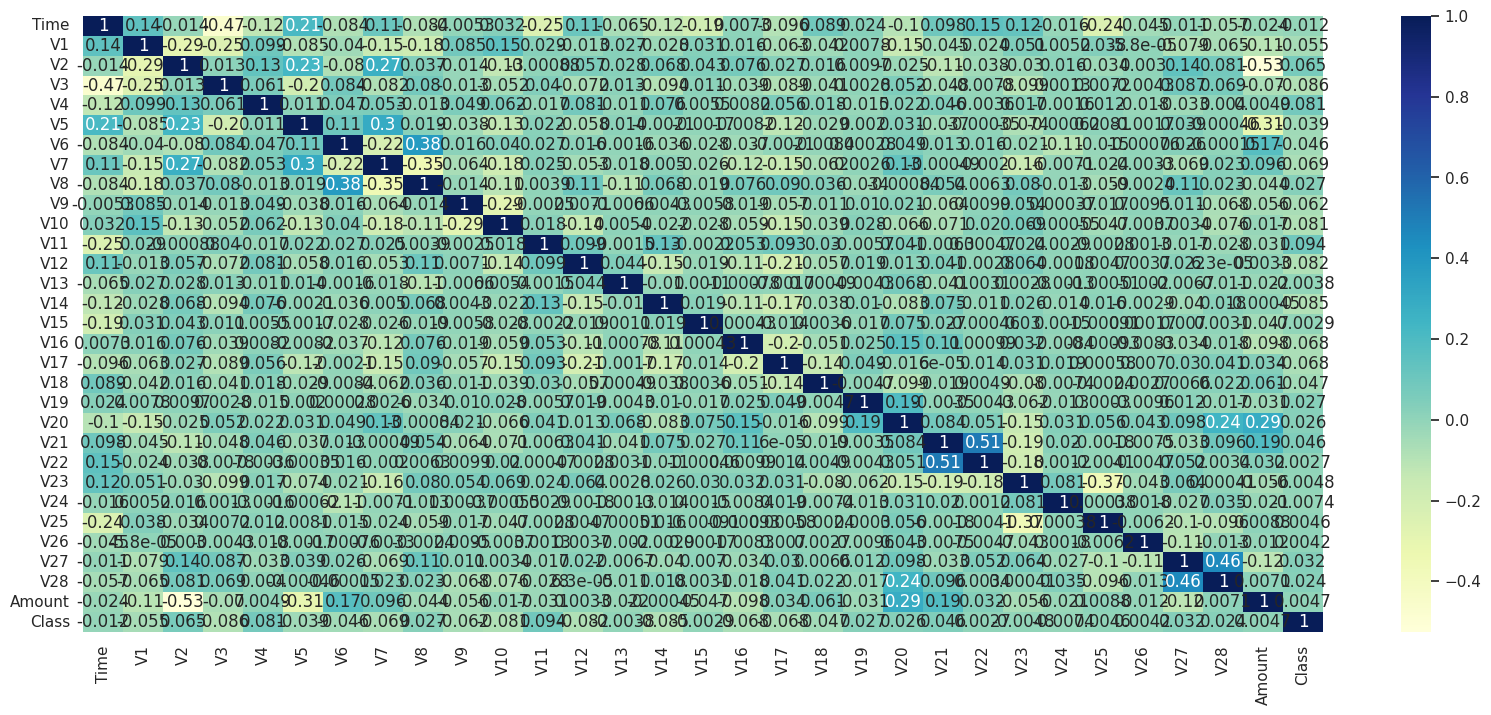

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
#sns.pairplot(df,hue="Class")
#plt.show()

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


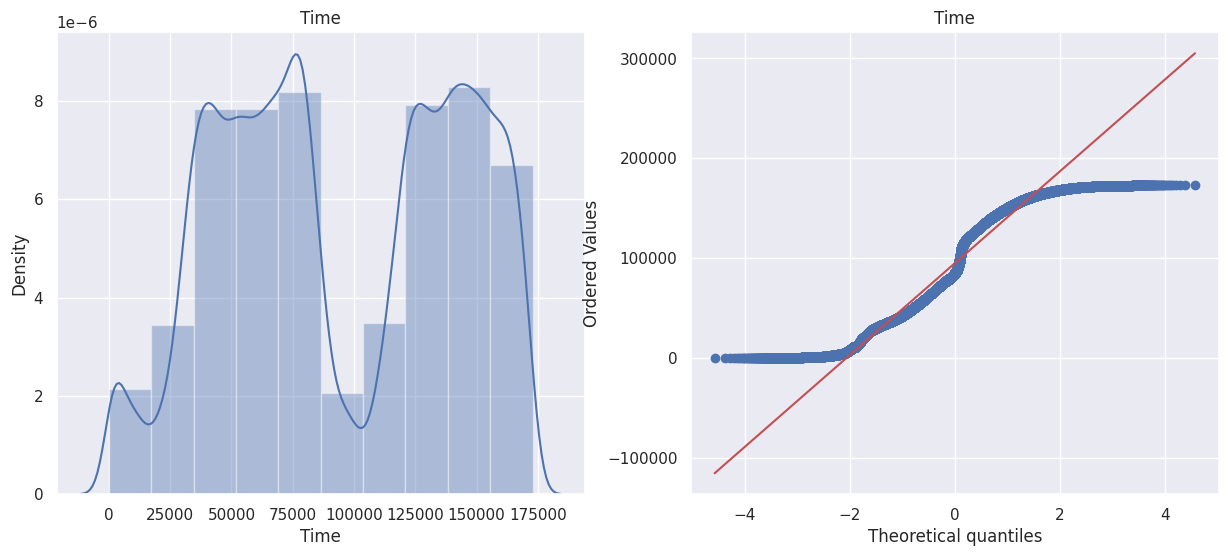

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


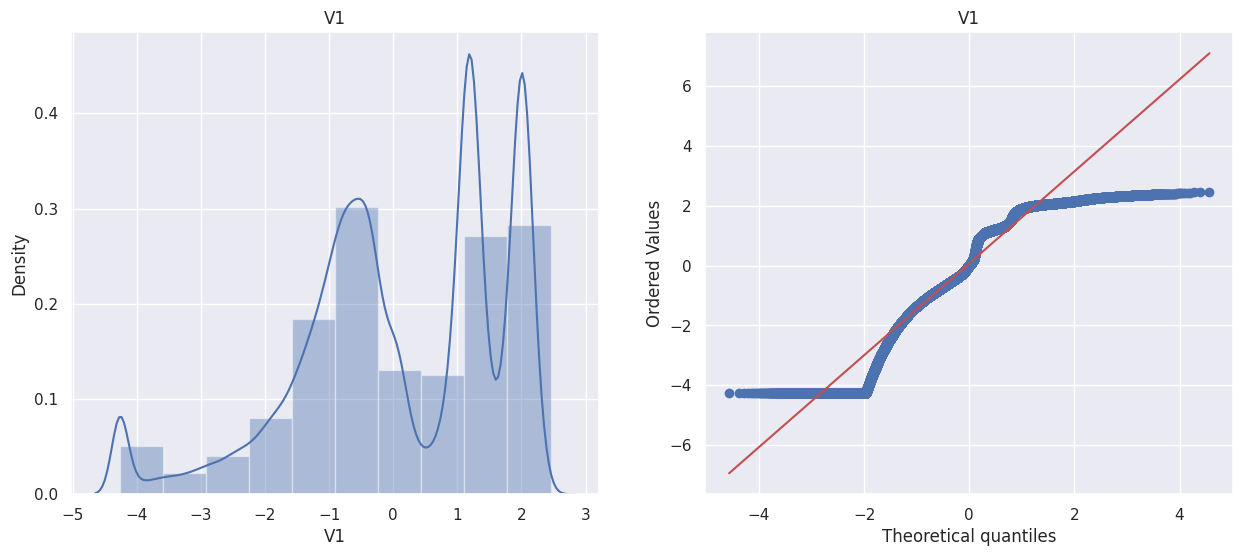

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


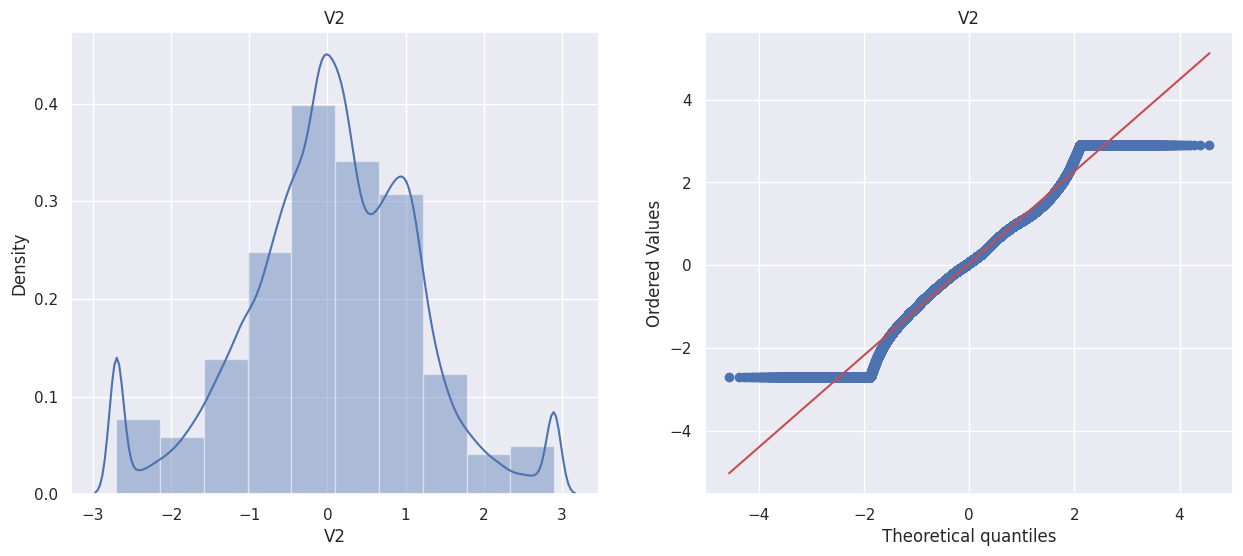

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


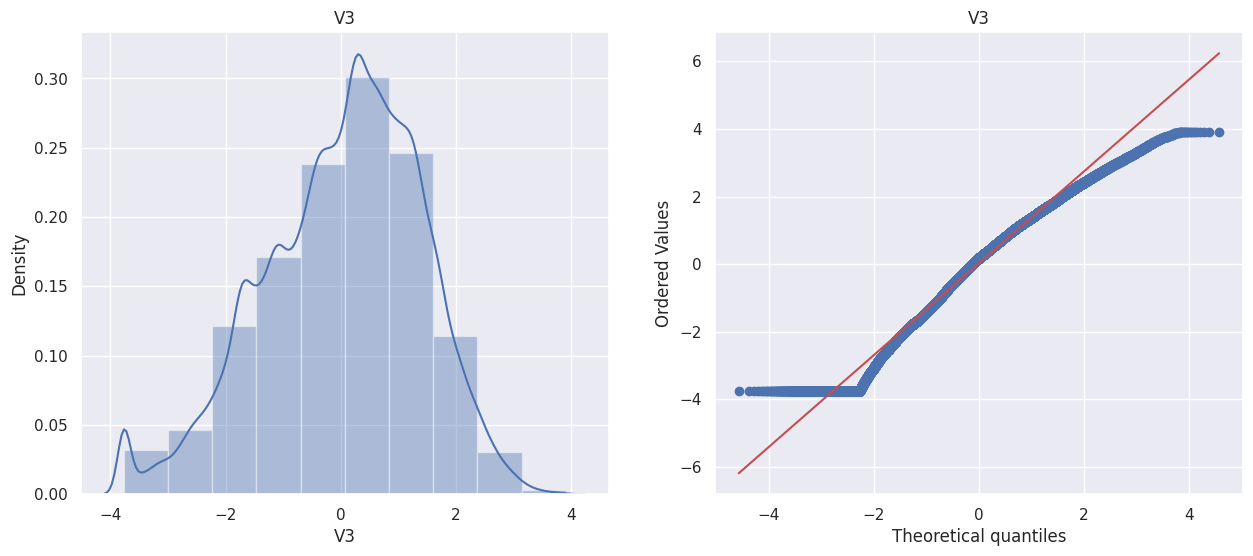

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


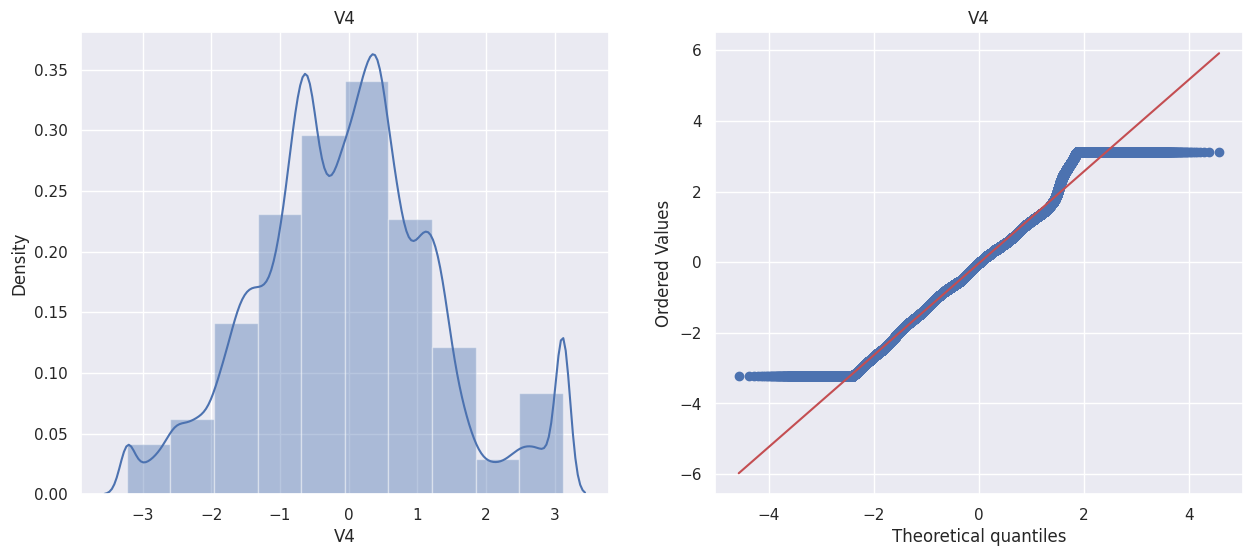

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


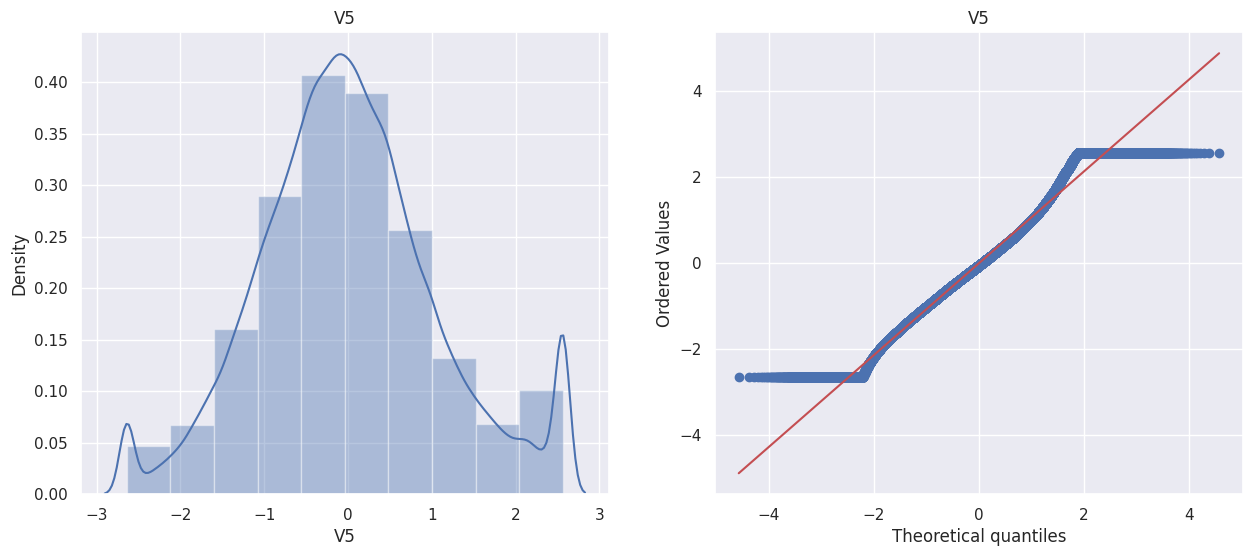

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


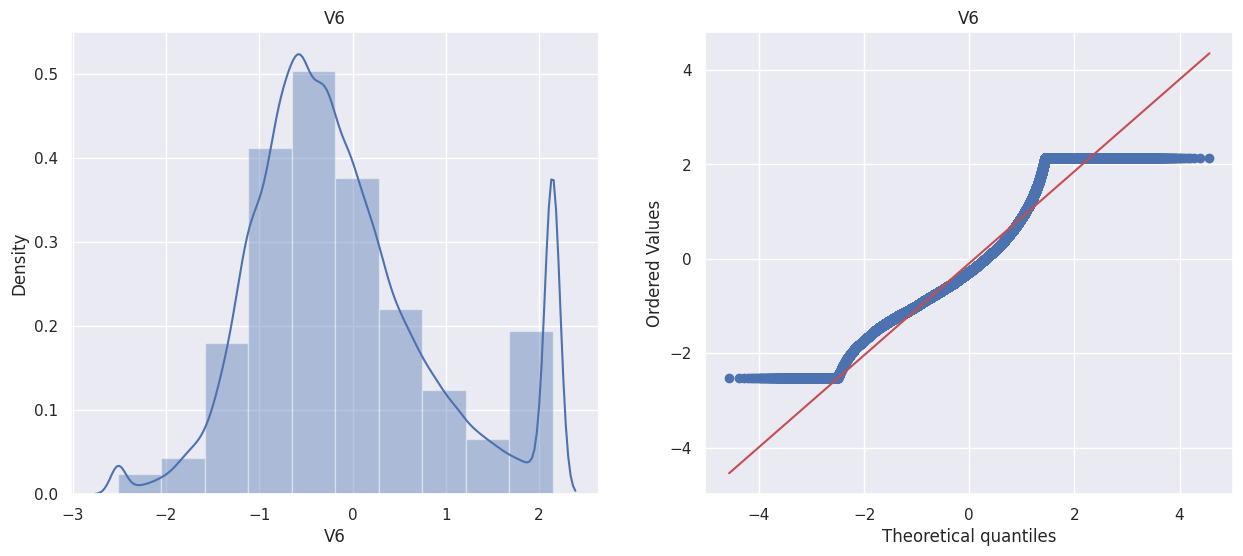

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


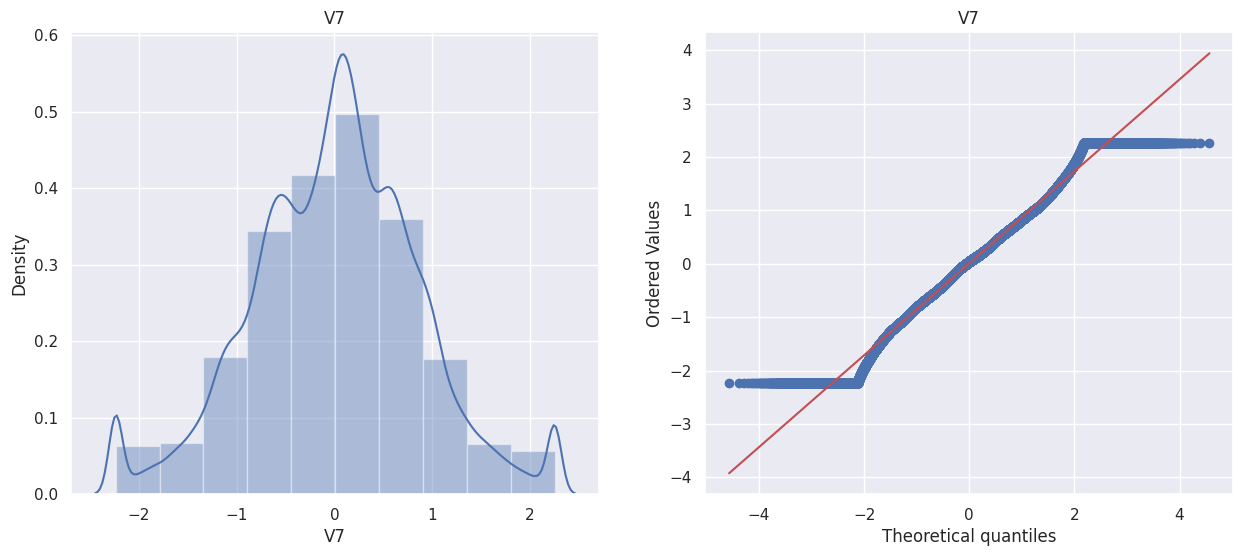

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


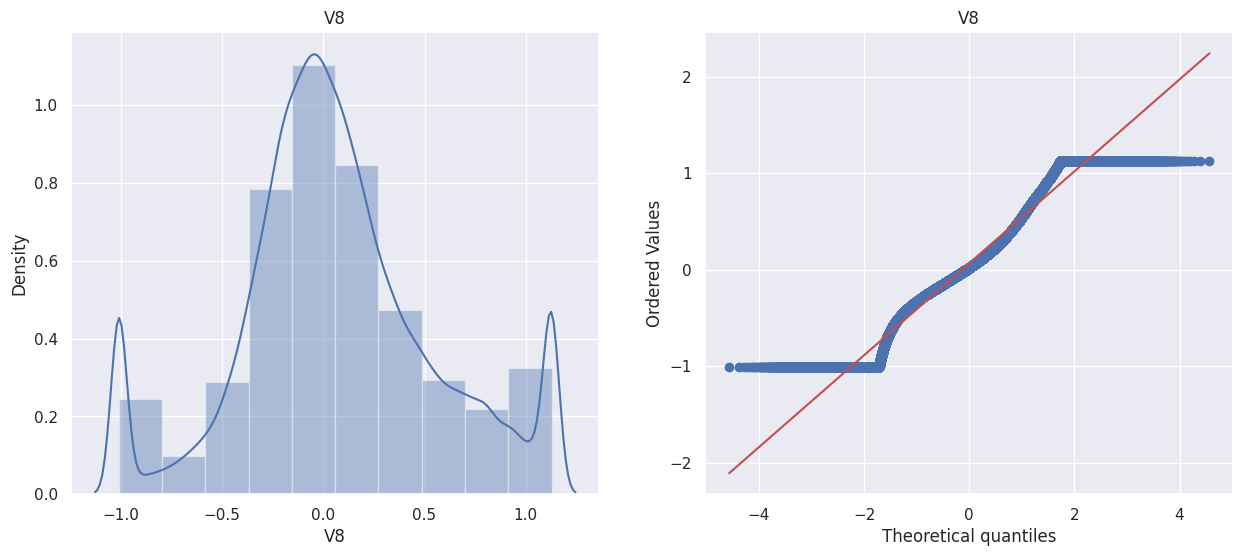

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


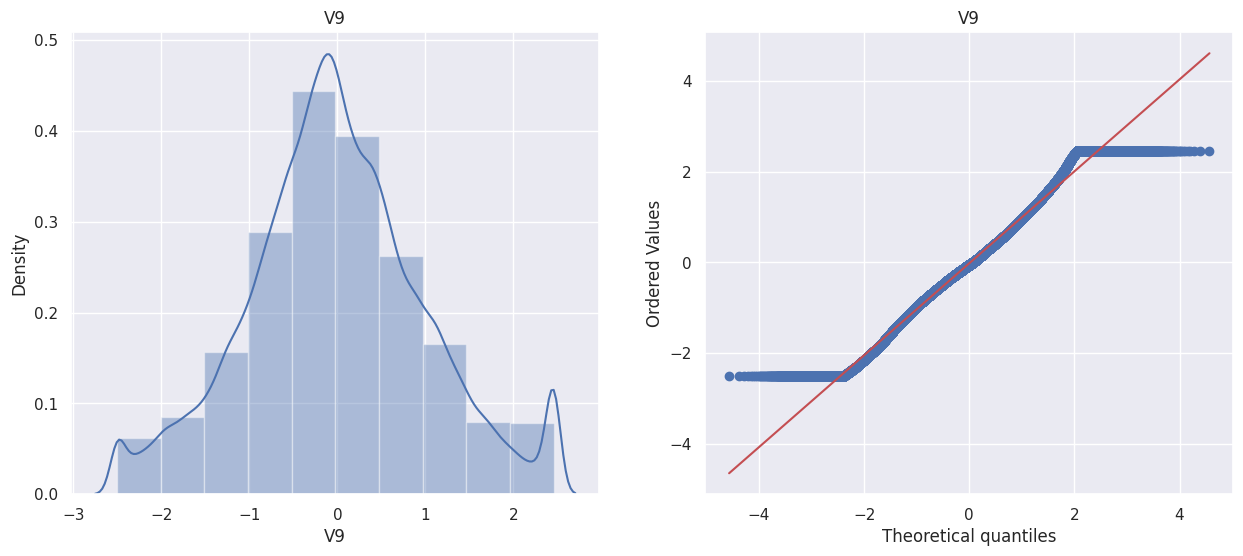

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


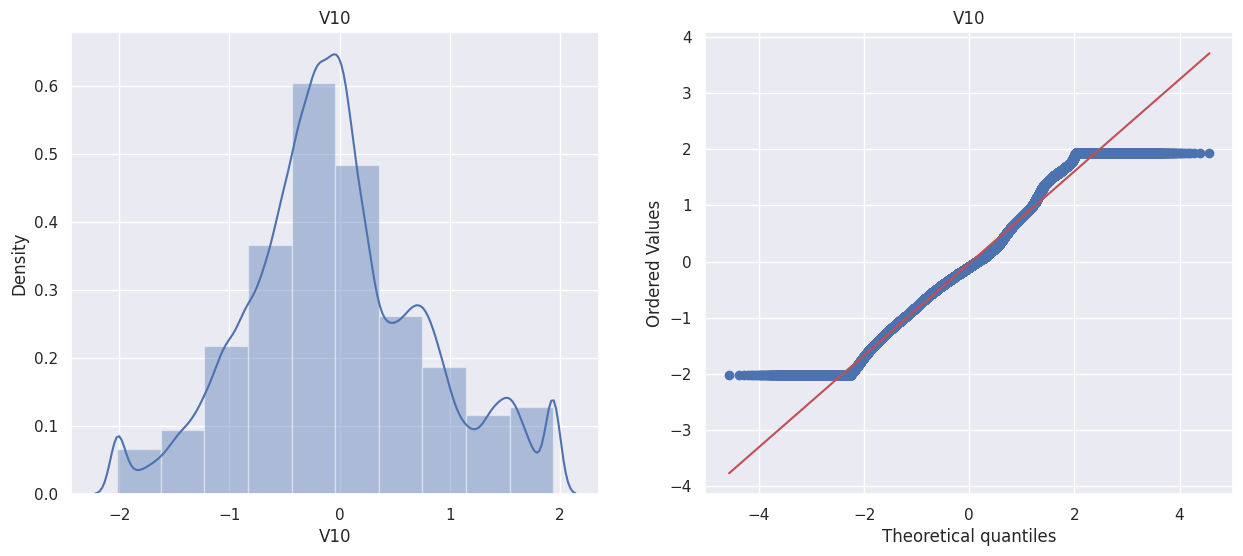

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


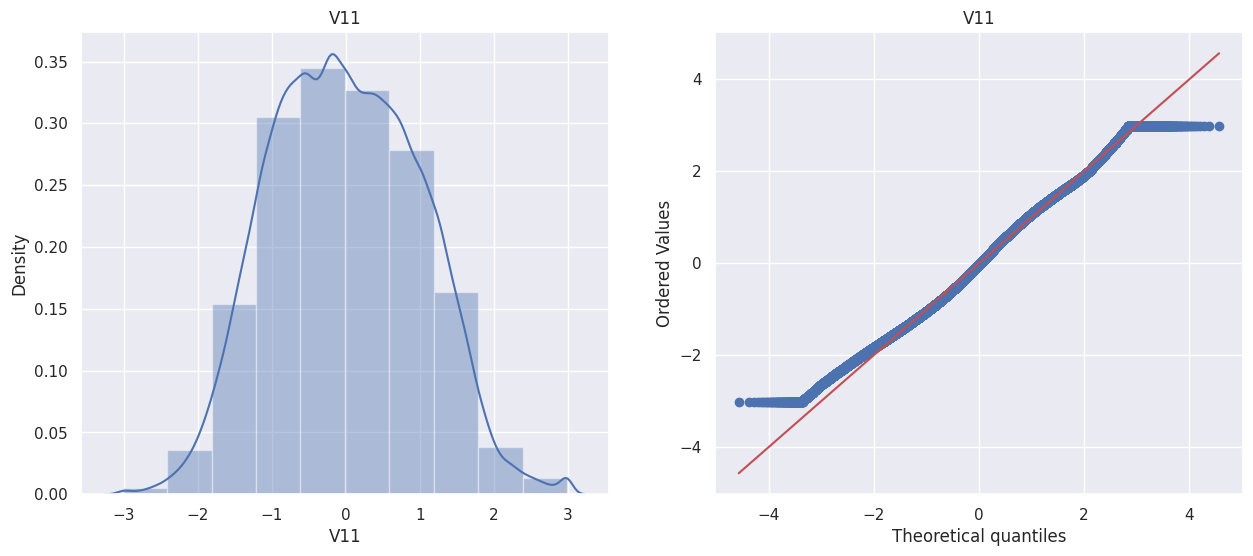

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


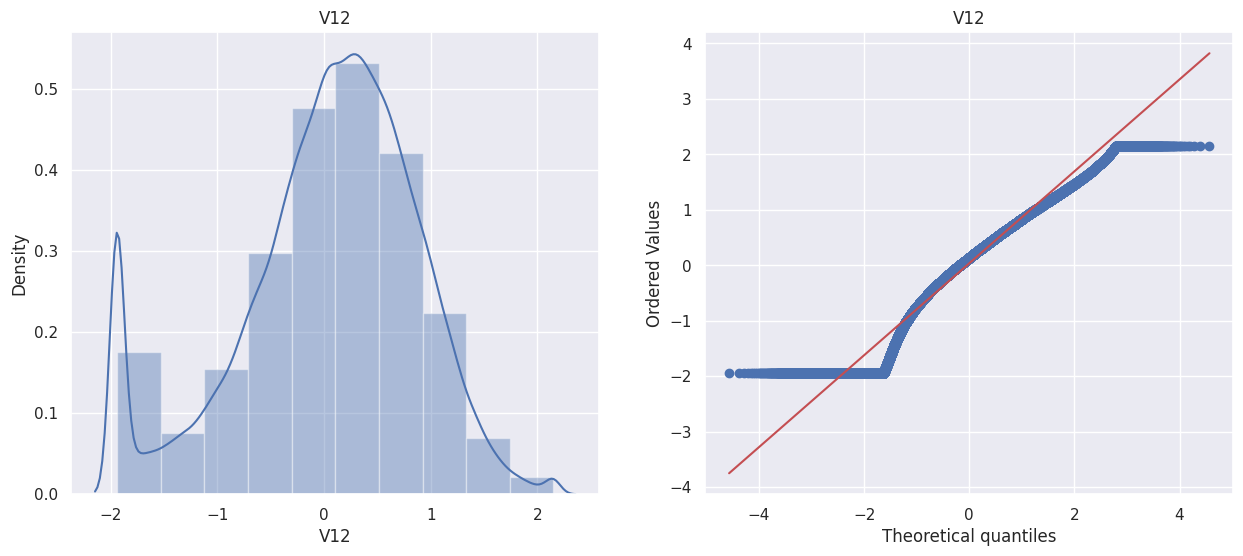

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


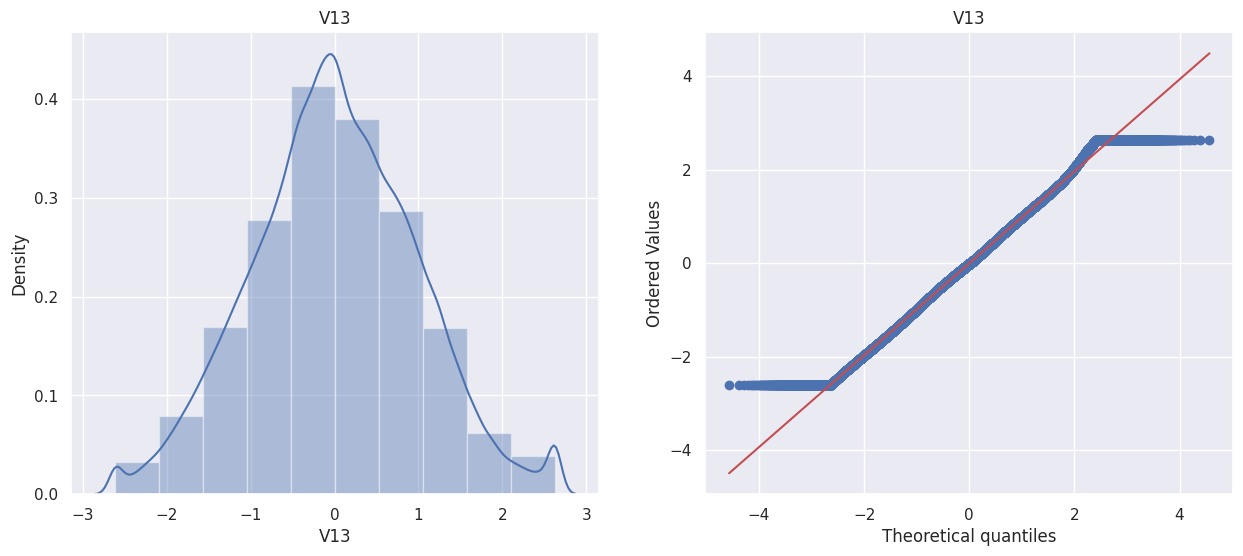

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


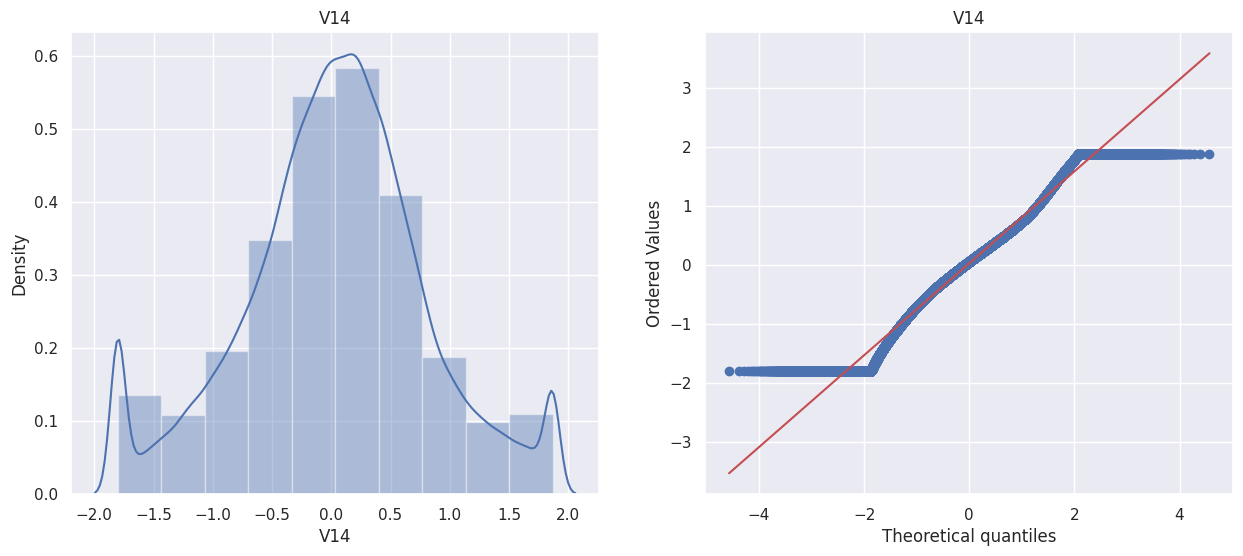

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


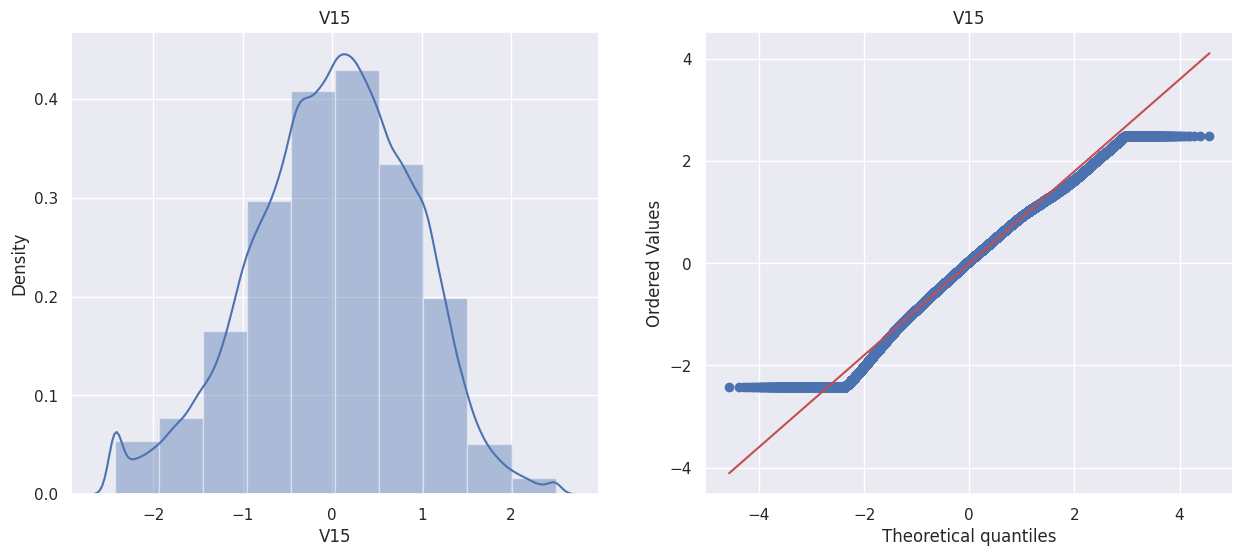

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


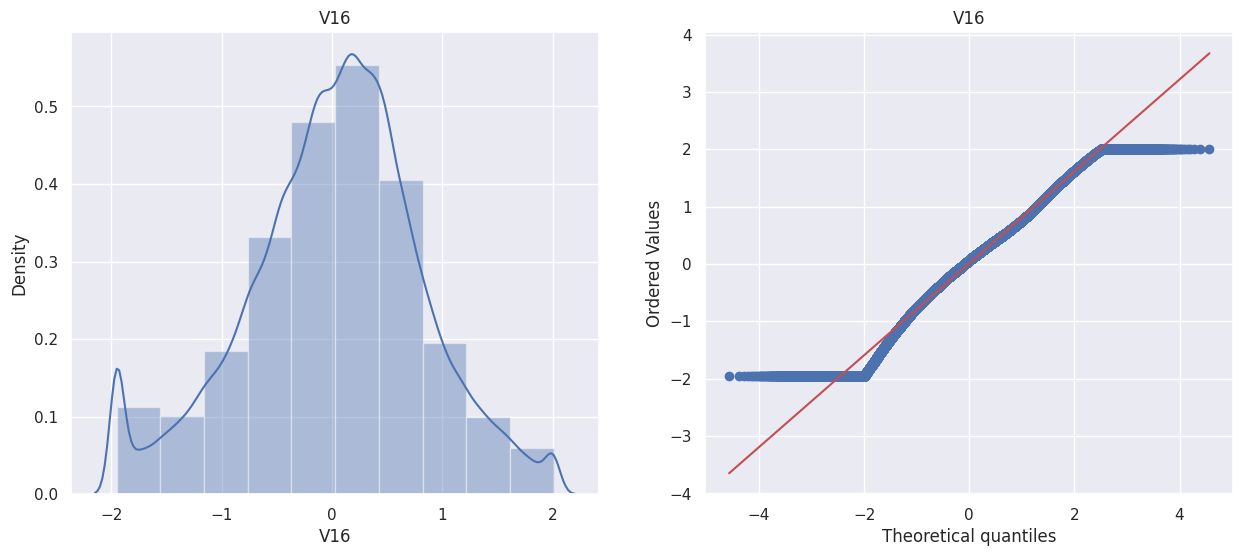

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


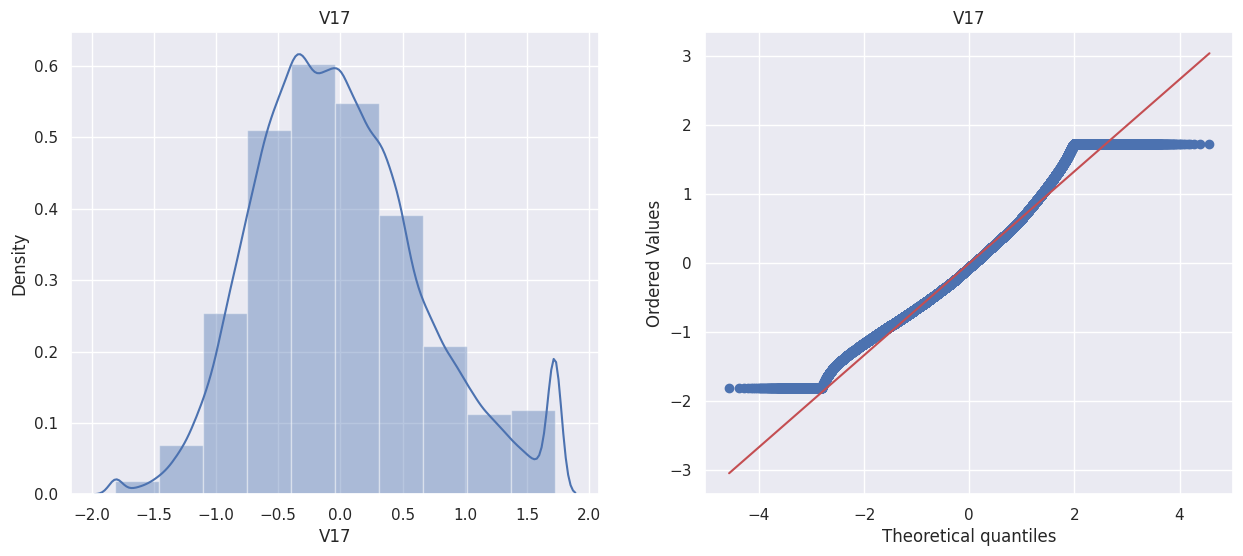

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


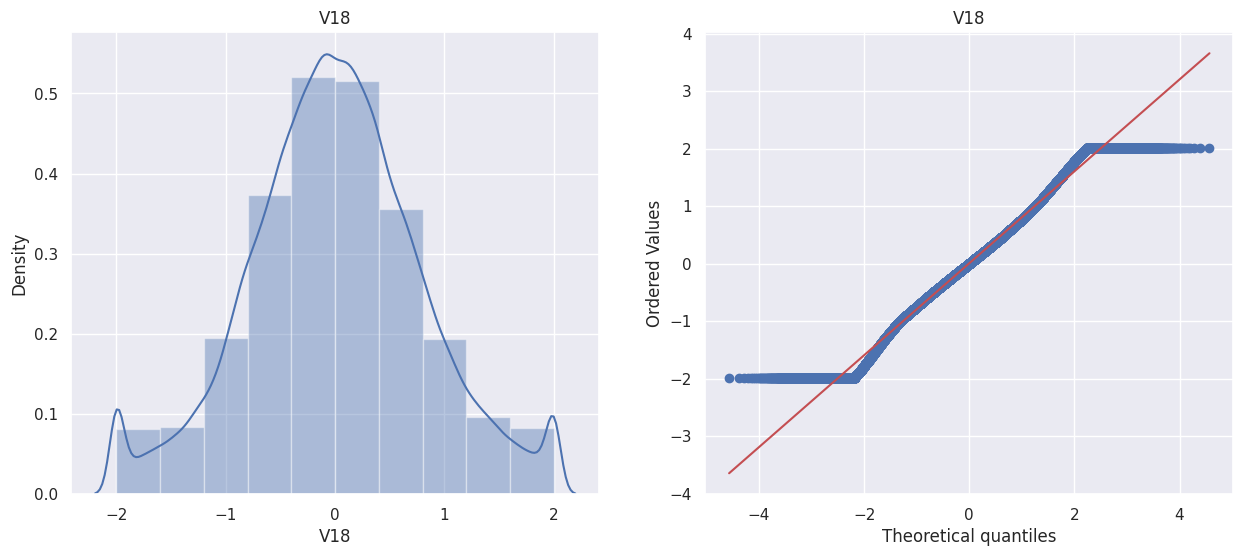

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


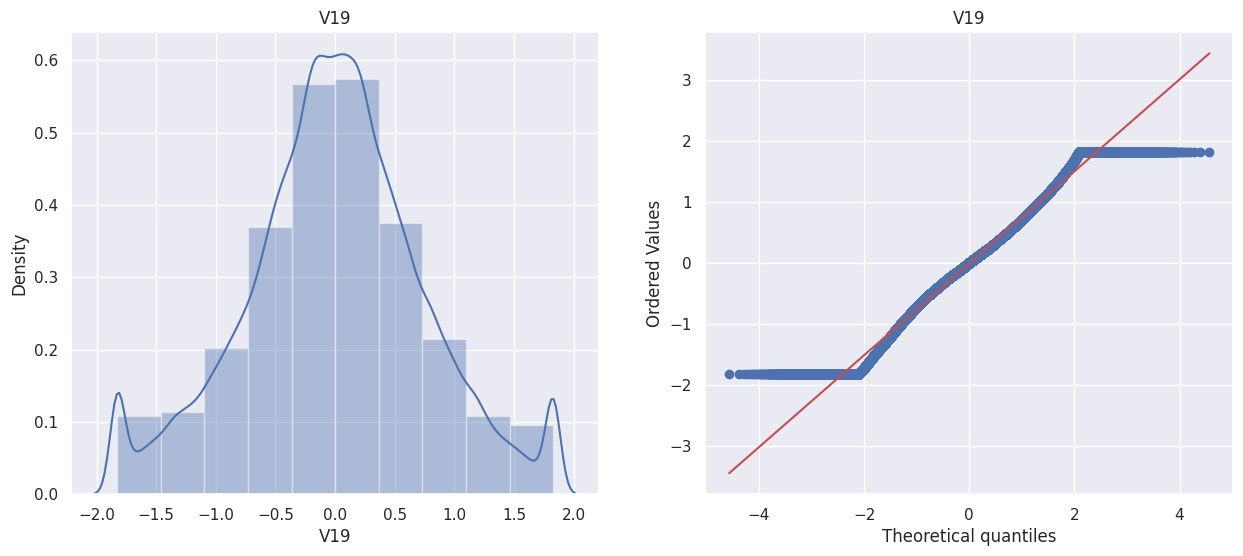

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


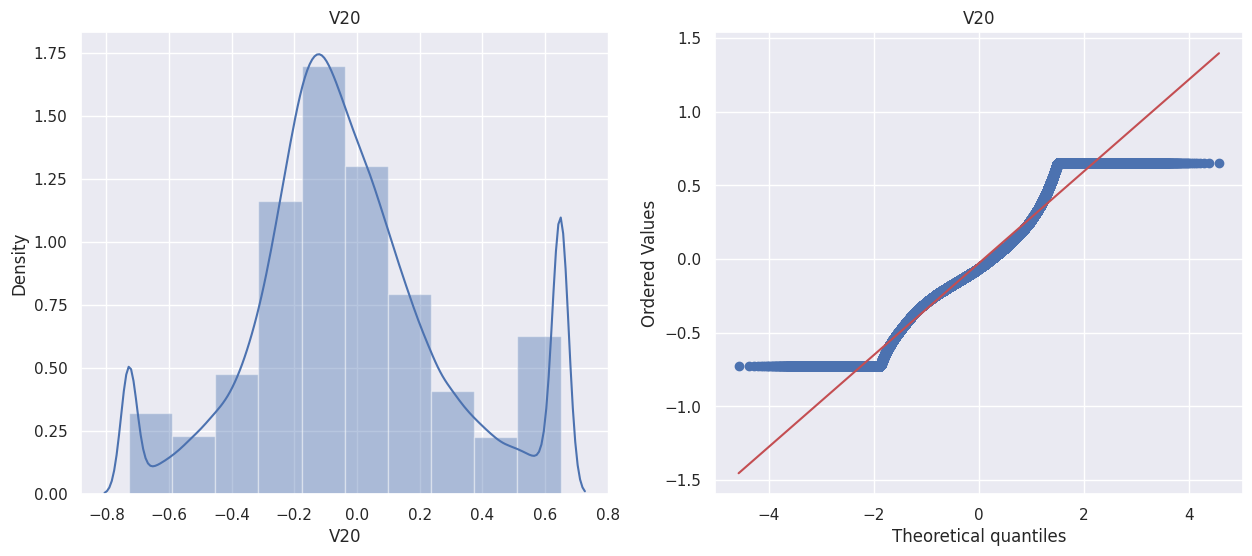

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


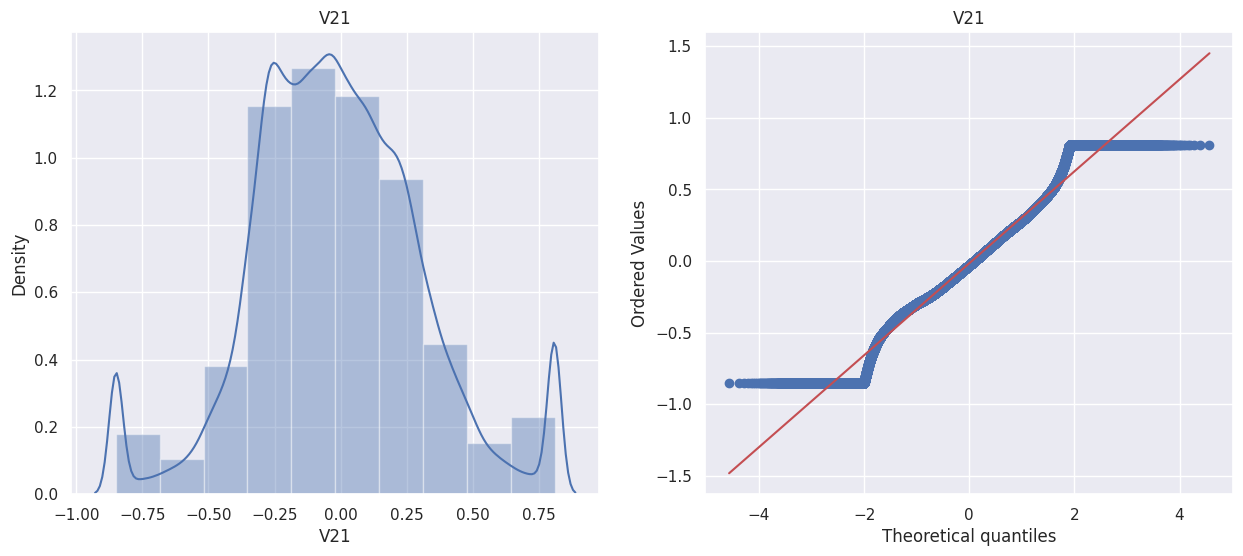

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


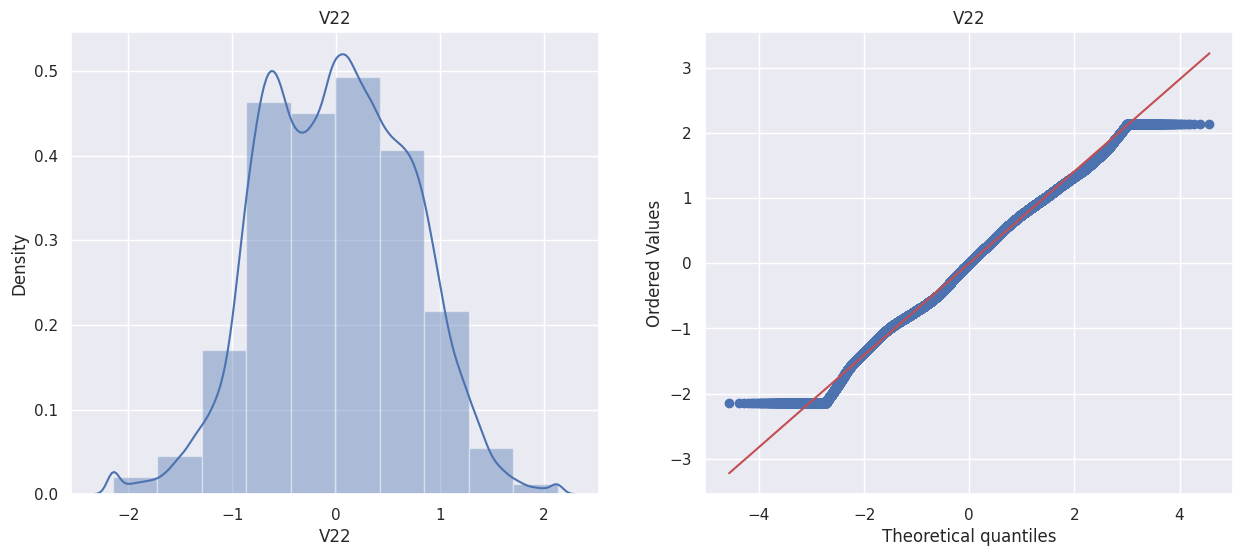

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


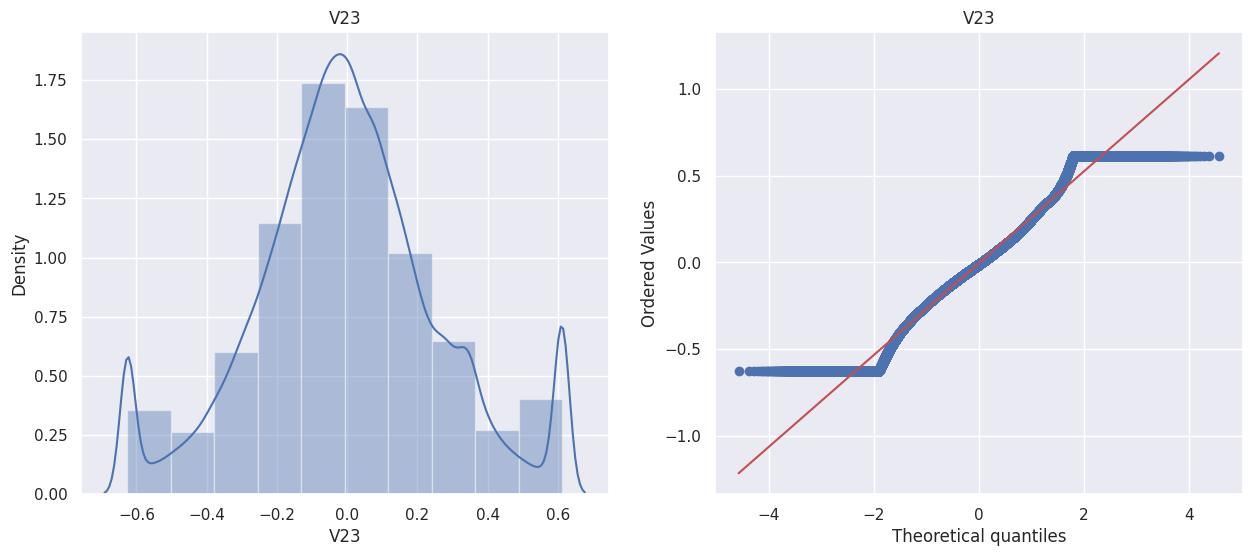

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


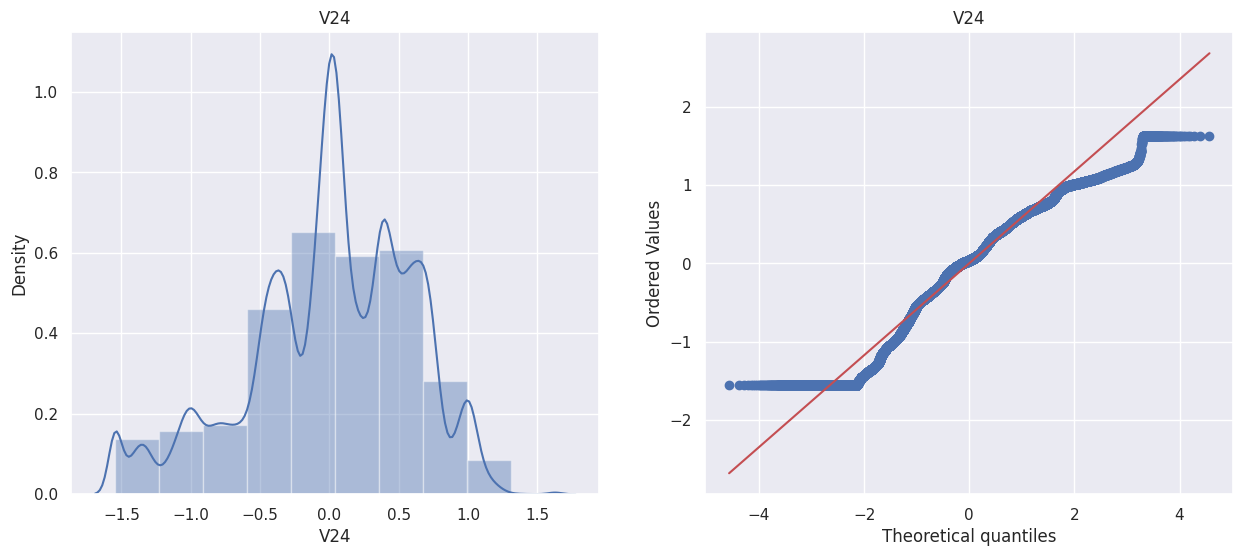

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


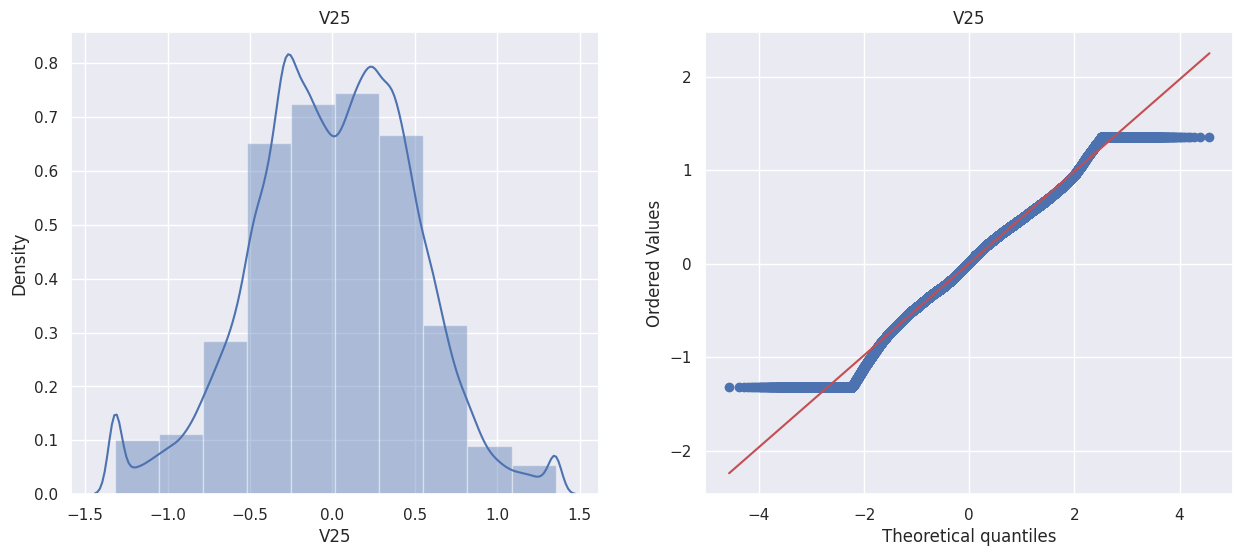

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


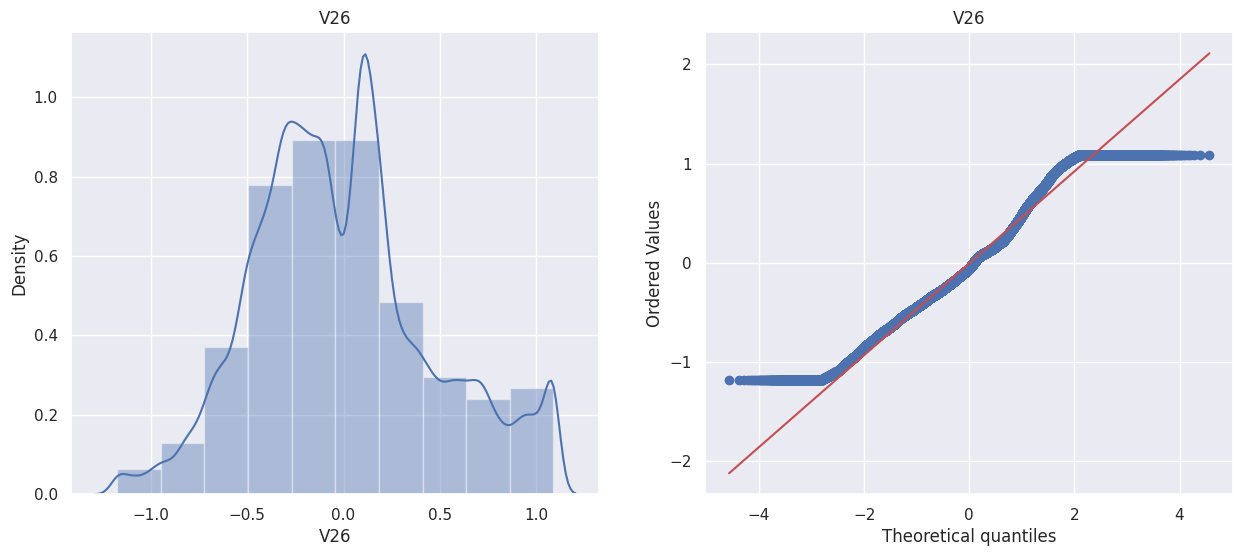

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


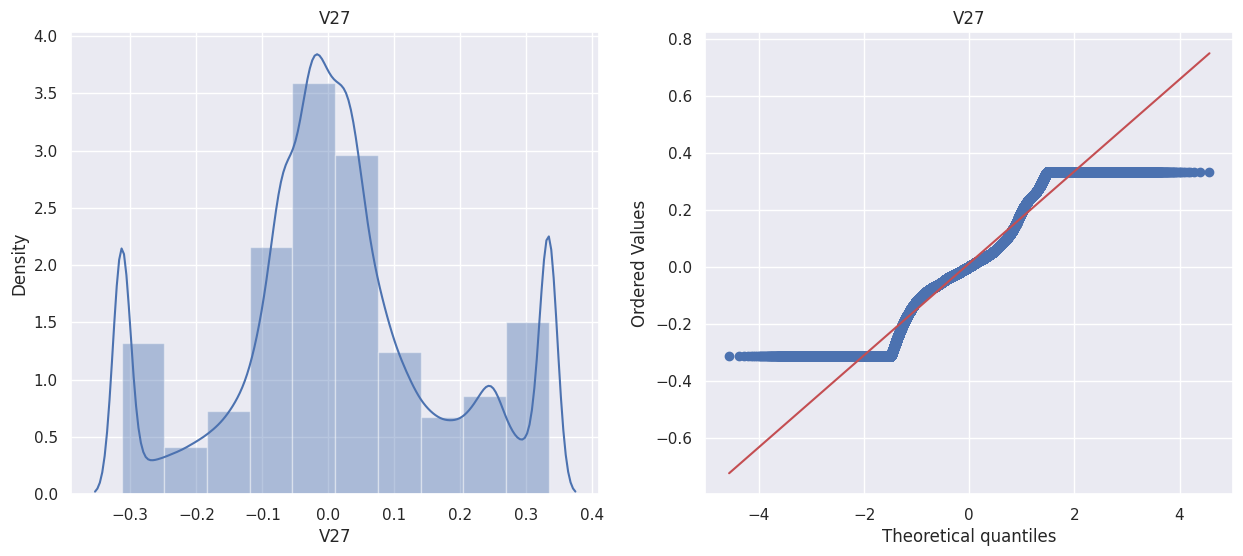

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


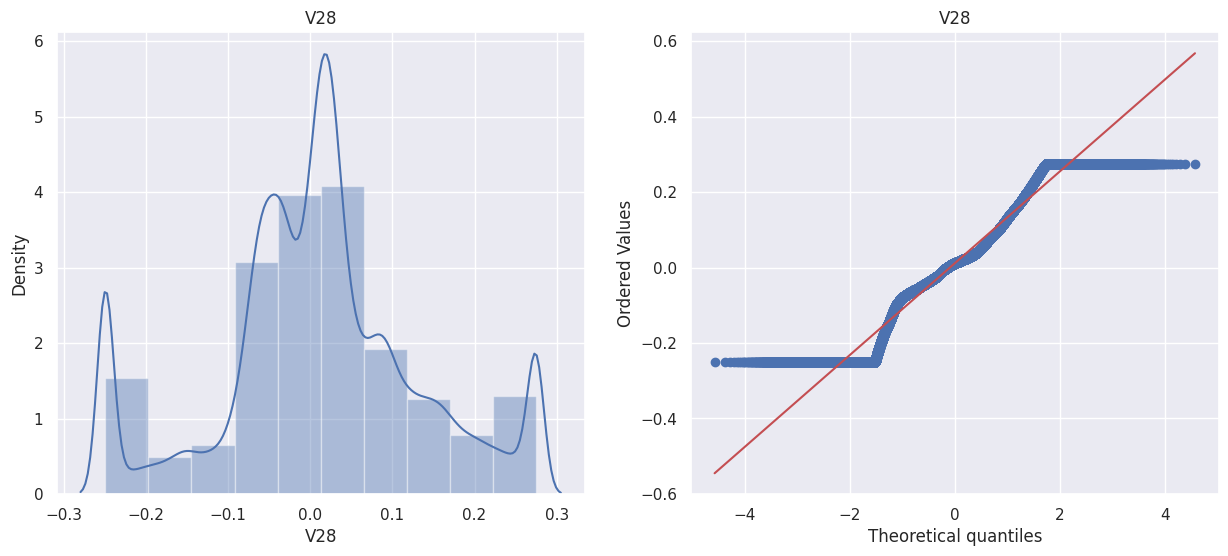

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


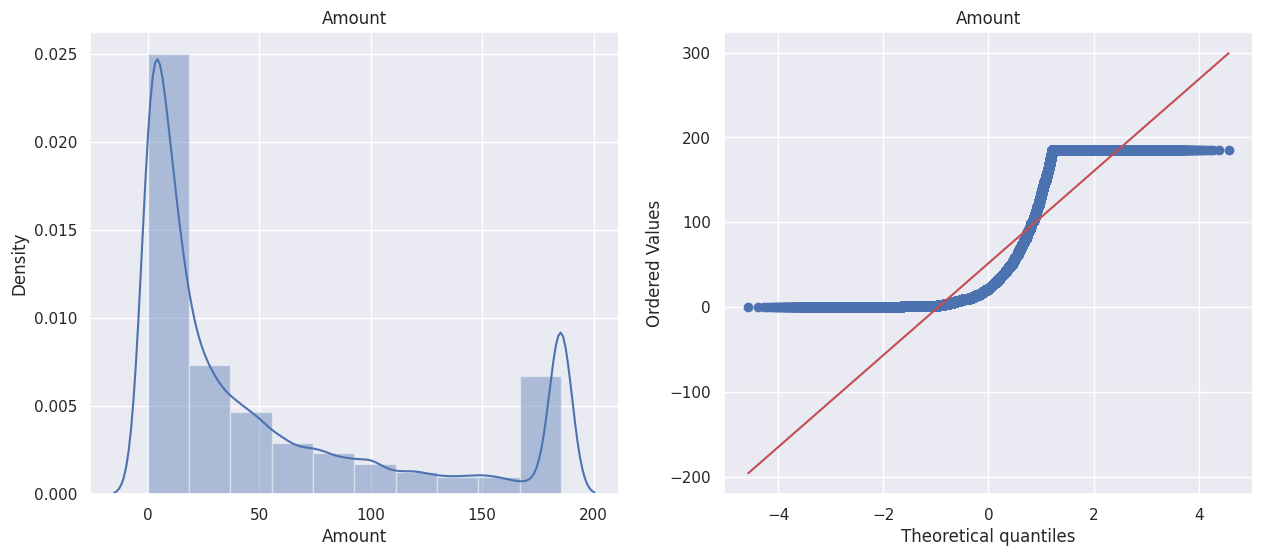

<ipython-input-40-1f3db6063511>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde=True, bins=10)


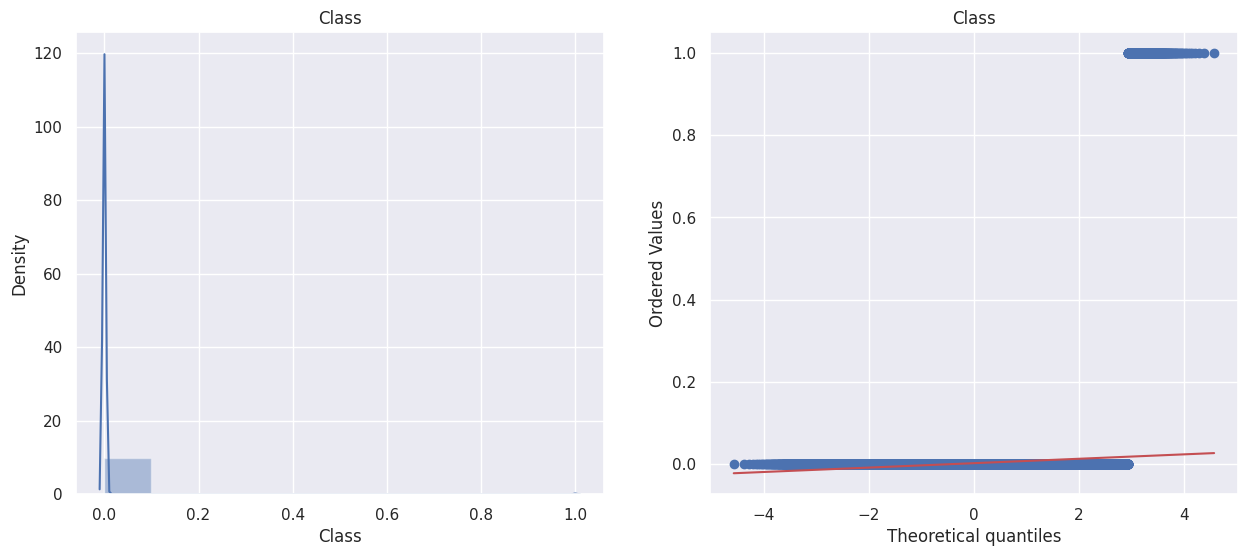

In [ ]:
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #df[variable].hist()
    sns.distplot(df[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in df.columns:
  plots(df, i)

# **Feature Engineering**

In [ ]:
X = df.iloc[:,1:30]
Y = df["Class"]

In [ ]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.611926   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28   Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.620  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.690  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  185.375  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.500  
4  0.141267 -0.206010  0.502292  0.219422  0.215153   69.990  

[5 rows x 29 columns]

#### **Mutual Information**

In [ ]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

V15       0.000088
V13       0.000107
V22       0.000152
V26       0.000266
V25       0.000355
V24       0.000413
V23       0.000830
V19       0.001099
V8        0.001764
V1        0.001768
V20       0.001826
V5        0.001842
V21       0.002129
V18       0.002195
V28       0.002308
V27       0.002734
V2        0.002818
V9        0.002842
V6        0.002878
V7        0.003180
Amount    0.003424
V4        0.003488
V16       0.003515
V12       0.003876
V3        0.004185
V14       0.004616
V10       0.005252
V11       0.005954
V17       0.007085
dtype: float64

<Axes: >

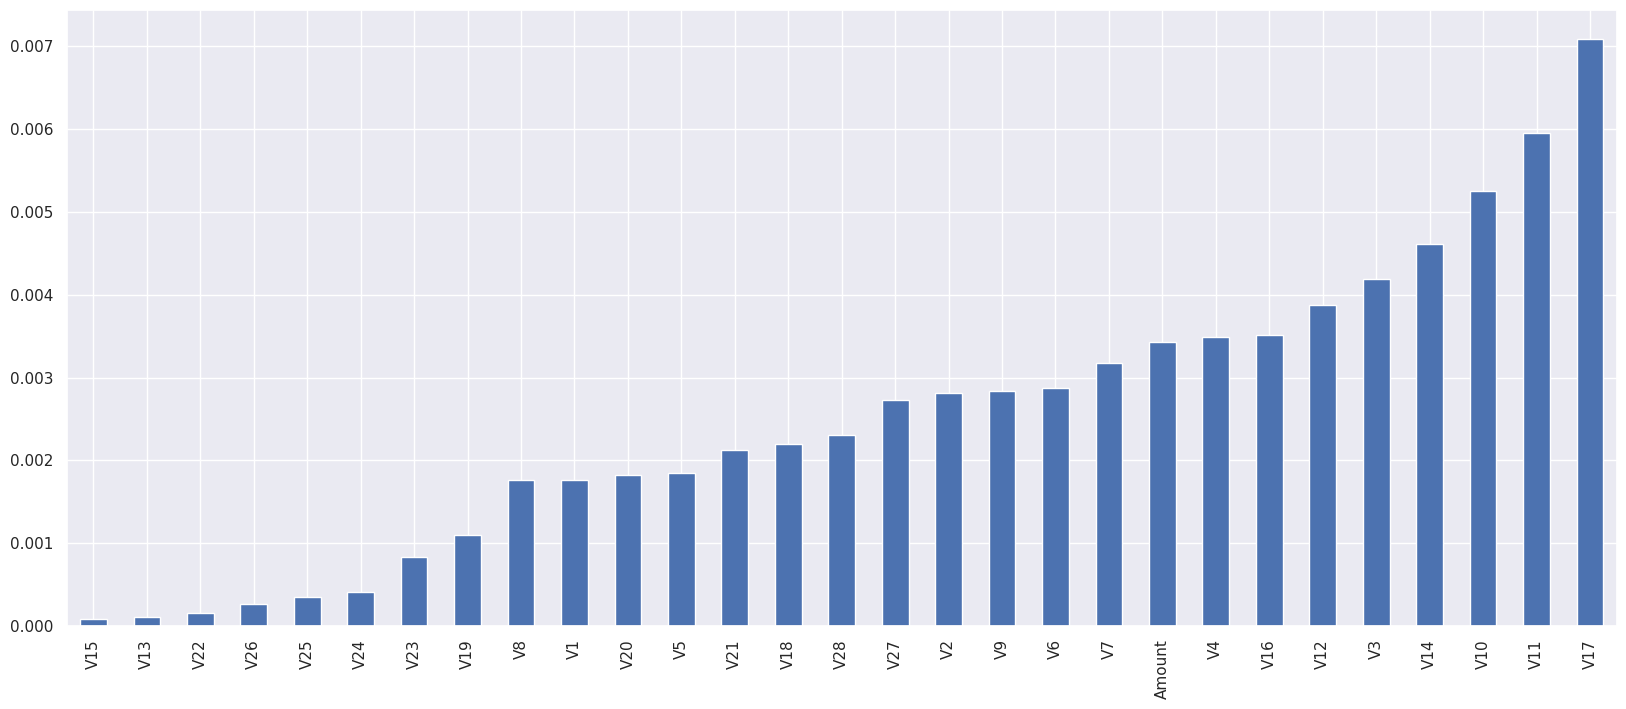

In [ ]:
mi_score.sort_values(ascending=True).plot.bar(figsize=(20, 8))

#### **Spliting Data Into Train And Test**

In [ ]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (198608, 29)
train_label :  (198608,)
test_data :  (85118, 29)
test_label :  (85118,)


#### **Normalizing Data**

In [ ]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [ ]:
train_data_sc

array([[ 1.17726986, -1.07203809, -0.36388992, ..., -0.29118894,
        -0.43298345,  1.00128445],
       [ 0.51809366, -0.72353392, -0.41197226, ...,  0.15899416,
         0.37518084,  1.90511488],
       [ 1.2050965 ,  0.33980651, -1.70307741, ..., -0.14274502,
        -0.37598084, -0.82251623],
       ...,
       [-1.52662875, -1.55725569,  1.05595363, ..., -0.12837919,
        -2.10127135,  1.80827591],
       [ 1.22268713, -0.25407121, -0.79143007, ..., -0.41925955,
        -0.76721085, -0.78539462],
       [ 0.44770112, -0.93508892,  0.64457005, ..., -0.02562446,
        -0.05779709,  0.87281142]])

#### **PCA**

In [ ]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [ ]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.06990923 0.0664618  0.06358987 0.05144435 0.04835055 0.04576442
 0.04443359 0.04372454 0.04146623 0.04027502 0.0397583  0.0390199
 0.03663672 0.03519371 0.03504501 0.0346182  0.03430595 0.03390055
 0.03331201 0.03180748 0.02434173 0.0196479  0.01812674 0.01704161
 0.01628022 0.0127787  0.01244904 0.00610923 0.0042074 ]


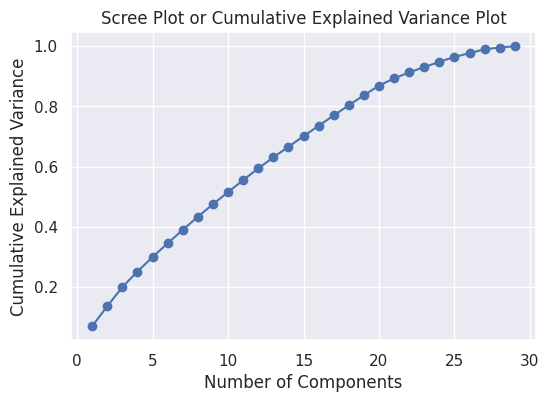

In [ ]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [ ]:
train_data_sc_pc.shape

(198608, 29)

In [ ]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 25


In [ ]:
train_data_sc_pc_select = train_data_sc_pc[:, :num_components]
test_data_sc_pc_select = test_data_sc_pc[:, :num_components]

In [ ]:
print("train_data : ",train_data_sc_pc_select.shape)
print("test_data : ",test_data_sc_pc_select.shape)

train_data :  (198608, 25)
test_data :  (85118, 25)


# **Model**

#### **Logistic Regression Model**

In [ ]:
model_lr = LogisticRegression().fit(train_data_sc_pc_select,train_label)

In [ ]:
model_lr.score(train_data_sc_pc_select,train_label)

0.9984139611697413

In [ ]:
y_pred_1 = model_lr.predict(test_data_sc_pc_select)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_pred_1,test_label))

0.9910007284005733


In [ ]:
confusion_matrix(y_pred_1,test_label)

array([[84345,   122],
       [  644,     7]])

In [ ]:
print(classification_report(y_pred_1,test_label))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     84467
           1       0.05      0.01      0.02       651

    accuracy                           0.99     85118
   macro avg       0.52      0.50      0.51     85118
weighted avg       0.99      0.99      0.99     85118



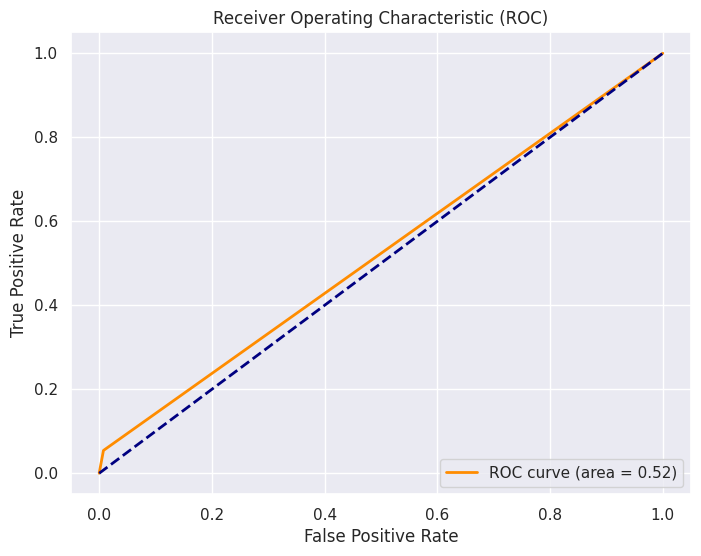

In [ ]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Cross_val_score : ",cross_val_score(model_lr,test_data_sc_pc_select,test_label,cv=5).mean())

Cross_val_score :  0.9984962081652906


#### **Decision Tree Model**

In [ ]:
model_dt = DecisionTreeClassifier().fit(train_data_sc_pc_select,train_label)

In [ ]:
y_pred_2 = model_dt.predict(test_data_sc_pc_select)

In [ ]:
print("Accuracy Score : ",accuracy_score(y_pred_2,test_label))

Accuracy Score :  0.9938555887121407


In [ ]:
confusion_matrix(y_pred_2,test_label)

array([[84592,   126],
       [  397,     3]])

In [ ]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84718
           1       0.02      0.01      0.01       400

    accuracy                           0.99     85118
   macro avg       0.51      0.50      0.50     85118
weighted avg       0.99      0.99      0.99     85118



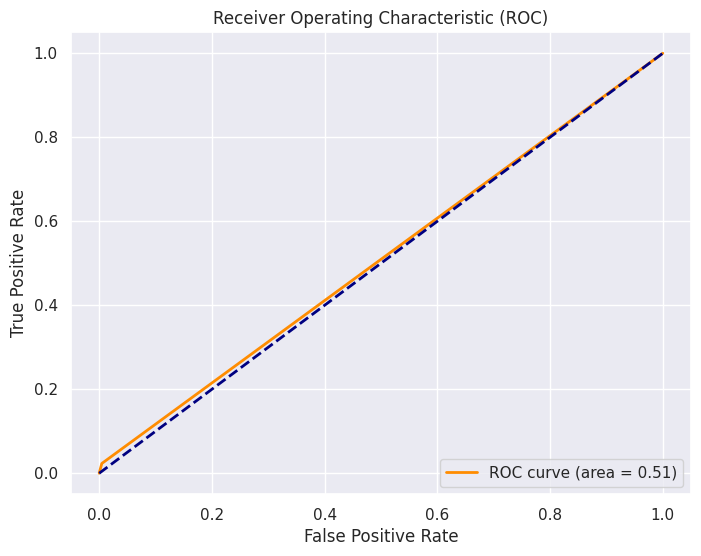

In [ ]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_2)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Cross_val_score : ",cross_val_score(model_dt,test_data_sc_pc_select,test_label,cv=5).mean())

Cross_val_score :  0.9971451439648877


[Text(0.36503016281669015, 0.9814814814814815, 'x[14] <= -3.532\ngini = 0.003\nsamples = 198608\nvalue = [198264, 344]'),
 Text(0.3617064479161257, 0.9444444444444444, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.3683538777172546, 0.9444444444444444, 'x[1] <= -3.544\ngini = 0.003\nsamples = 198601\nvalue = [198264, 337]'),
 Text(0.02658971920451558, 0.9074074074074074, 'x[0] <= -0.312\ngini = 0.098\nsamples = 716\nvalue = [679, 37]'),
 Text(0.01329485960225779, 0.8703703703703703, 'x[13] <= -0.397\ngini = 0.491\nsamples = 51\nvalue = [22, 29]'),
 Text(0.006647429801128895, 0.8333333333333334, 'x[22] <= -0.948\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.0033237149005644474, 0.7962962962962963, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.009971144701693342, 0.7962962962962963, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.019942289403386684, 0.8333333333333334, 'x[19] <= -0.724\ngini = 0.257\nsamples = 33\nvalue = [5, 28]'),
 Text(0.016618574502822236, 

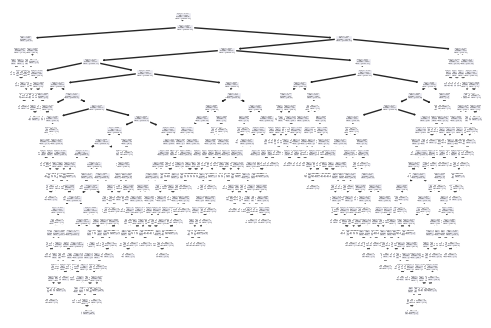

In [ ]:
from sklearn import tree

tree.plot_tree(model_dt)

#### **SVM Model**

In [ ]:
model_svm = SVC(gamma='auto').fit(train_data_sc_pc_select,train_label)

In [ ]:
y_pred_3 = model_svm.predict(test_data_sc_pc_select)

In [ ]:
print("Accuracy_score : ",accuracy_score(y_pred_3,test_label))

Accuracy_score :  0.9971216428957447


In [ ]:
confusion_matrix(y_pred_3,test_label)

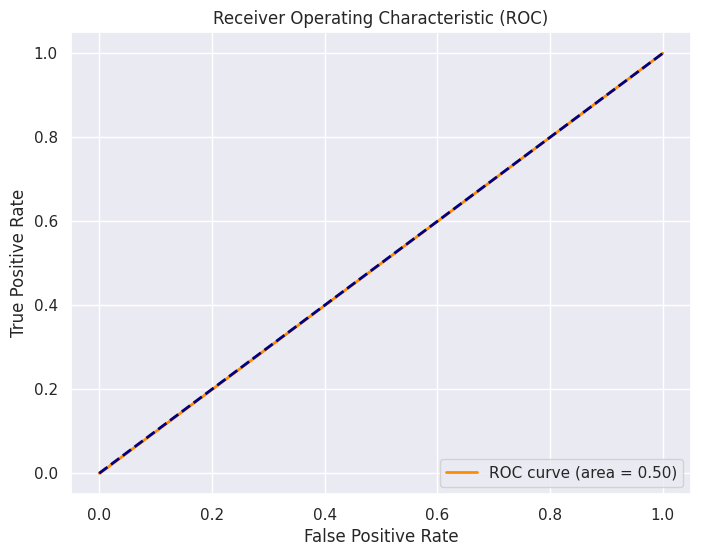

In [92]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_3)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [93]:
print("Cross_val_score : ",cross_val_score(model_svm,test_data_sc_pc_select,test_label,cv=5).mean())

Cross_val_score :  0.9988721556063689


#### **XGBOOST Model**

In [94]:
model_xg = xgb.XGBClassifier().fit(train_data_sc_pc_select,train_label)

In [95]:
y_pred_4 = model_xg.predict(test_data_sc_pc_select)

In [96]:
print("Accuracy Score : ",accuracy_score(y_pred_4,test_label))

Accuracy Score :  0.9977795530910031


In [97]:
confusion_matrix(y_pred_4,test_label)

array([[84926,   126],
       [   63,     3]])

In [98]:
print(classification_report(y_pred_4,test_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85052
           1       0.02      0.05      0.03        66

    accuracy                           1.00     85118
   macro avg       0.51      0.52      0.51     85118
weighted avg       1.00      1.00      1.00     85118



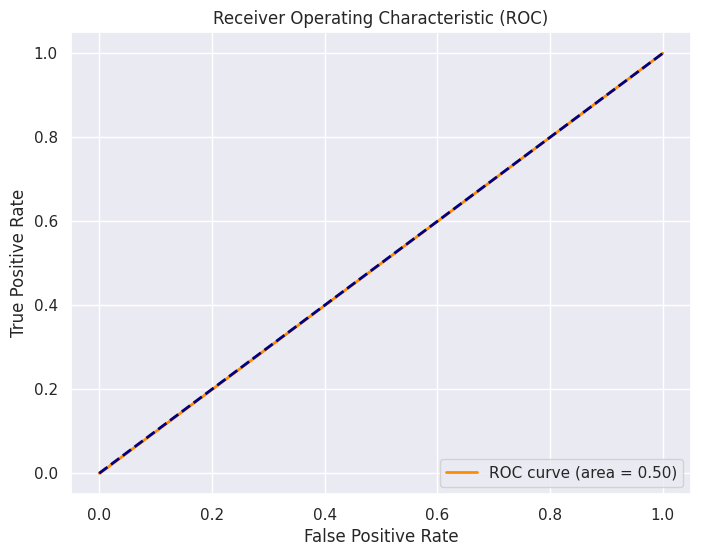

In [99]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_3)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [100]:
print("Cross_val_score : ",cross_val_score(model_xg,test_data_sc_pc_select,test_label,cv=5).mean())

Cross_val_score :  0.9986959317314611
